# CDC NHANES 2013-2014 Dataset

## Overview

The purpose of this notebook is to become familiar with each dataset, as well as cleaning the data to prepare it for EDA and Modeling. 

The following datasets are included:

- __Demographic__: holds demographic information of survey partipants
  
- __Questionnaire__: contains basic level information of participant's medical history, physical activity, family-level information, and dietary behavior
  
- __Labs__: includes test of blood or urine samples, cholesterol levels, blood glucose, and other metabolic indicators
  
- __Diet__: provides detailed information on participants' dietary intake
  
- __Examination__: contains physical examination of participants such as bmi, height, waist circumference, blood pressure readings, and other assessments.
  
- __Medication__: contain prescription information, amount of medications used, and how frequent the medications are taken 

The overall goal is to find columns that can be provide an insight on whether or not an individual is at risk or has a cardiovascular illness(es).

__Note:__ There is no target variable present, or a column that can confirm a participant has cardiovascular disease

The goals of this notebook are listed below:

- Make sure all datasets have relevant columns, remove columns that may seem irrelevant for predicting cardiovascular diseases
- Have 6 clean datasets, with matching SEQN numbers to confirm the same participants are present in each dataset
- Rename columns to gain better insights on what the data the column contains, instead of looking at data dictionary each time 
- Save the clean, filtered, and renamed dataframes into CSV files for EDA and Clustering!

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
#import os
#os.environ["OMP_NUM_THREADS"] = '4'
#from sklearn.cluster import MiniBatchKMeans,KMeans
#from sklearn.decomposition import PCA

## Importing Datasets 

### Cleaning Demographic Dataset

In [202]:
demographic_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Original_Data/demographic.csv')
demographic_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [7]:
#viewing demographic dataset rows and columns 
demographic_df.shape

(10175, 47)

#### Addressing Nulls

Reviewing/researching columns from demographic dataset 

In [10]:
#checking for nulls
demographic_df.isna().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR       0
RIDAGEMN    9502
RIDRETH1       0
RIDRETH3       0
RIDEXMON     362
RIDEXAGM    5962
DMQMILIZ    3914
DMQADFC     9632
DMDBORN4       0
DMDCITZN       4
DMDYRSUS    8267
DMDEDUC3    7372
DMDEDUC2    4406
DMDMARTL    4406
RIDEXPRG    8866
SIALANG        0
SIAPROXY       1
SIAINTRP       0
FIALANG      121
FIAPROXY     121
FIAINTRP     121
MIALANG     2864
MIAPROXY    2863
MIAINTRP    2862
AIALANGA    3858
DMDHHSIZ       0
DMDFMSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGE       0
DMDHRBR4     297
DMDHREDU     294
DMDHRMAR     123
DMDHSEDU    4833
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     133
INDFMIN2     123
INDFMPIR     785
dtype: int64

In [12]:
# creating new demographic data frame with relevant variables 
demographic_df_clean = demographic_df[['SEQN', 'RIAGENDR', 'RIDAGEYR',       
'RIDRETH1', 'RIDRETH3','DMDBORN4','DMDCITZN','DMDEDUC2',
'DMDMARTL','SIALANG','SIAINTRP','DMDHHSIZ','DMDFMSIZ','DMDHHSZA',
'DMDHHSZB','DMDHHSZE','DMDHRGND','DMDHRAGE','DMDHREDU','DMDHRMAR',
'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA','INDHHIN2','INDFMIN2',
'INDFMPIR']].copy()

In [14]:
demographic_df_clean.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,...,DMDHRAGE,DMDHREDU,DMDHRMAR,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,1,69,4,4,1,1.0,3.0,4.0,1,...,69,3.0,4.0,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,1,54,3,3,1,1.0,3.0,1.0,1,...,54,3.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,1,72,3,3,1,1.0,4.0,1.0,1,...,72,4.0,1.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,1,9,3,3,1,1.0,NaN,NaN,1,...,33,3.0,1.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,2,73,3,3,1,1.0,5.0,1.0,1,...,78,5.0,1.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [16]:
demographic_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   RIAGENDR  10175 non-null  int64  
 2   RIDAGEYR  10175 non-null  int64  
 3   RIDRETH1  10175 non-null  int64  
 4   RIDRETH3  10175 non-null  int64  
 5   DMDBORN4  10175 non-null  int64  
 6   DMDCITZN  10171 non-null  float64
 7   DMDEDUC2  5769 non-null   float64
 8   DMDMARTL  5769 non-null   float64
 9   SIALANG   10175 non-null  int64  
 10  SIAINTRP  10175 non-null  int64  
 11  DMDHHSIZ  10175 non-null  int64  
 12  DMDFMSIZ  10175 non-null  int64  
 13  DMDHHSZA  10175 non-null  int64  
 14  DMDHHSZB  10175 non-null  int64  
 15  DMDHHSZE  10175 non-null  int64  
 16  DMDHRGND  10175 non-null  int64  
 17  DMDHRAGE  10175 non-null  int64  
 18  DMDHREDU  9881 non-null   float64
 19  DMDHRMAR  10052 non-null  float64
 20  WTINT2YR  10175 non-null  fl

#### Imputation

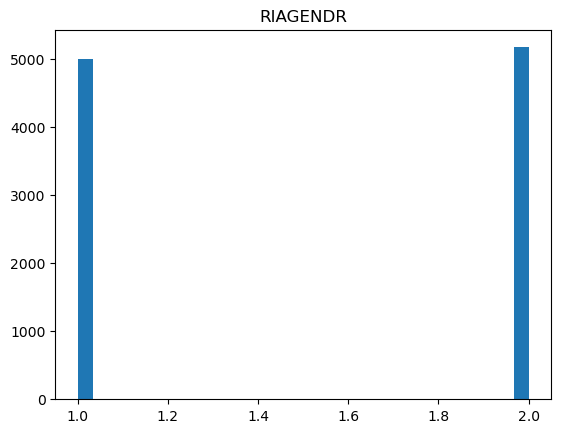

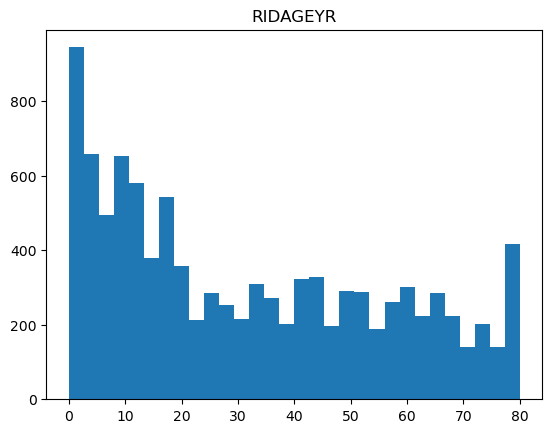

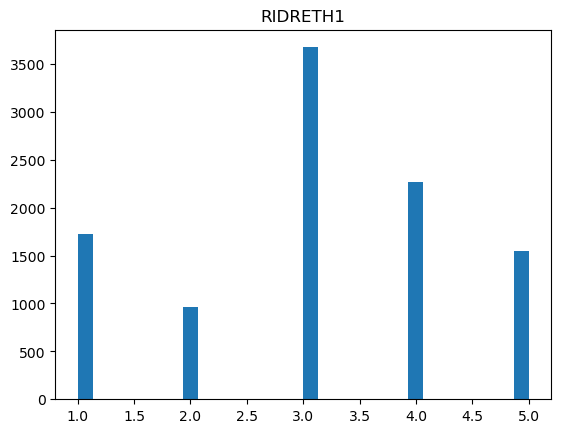

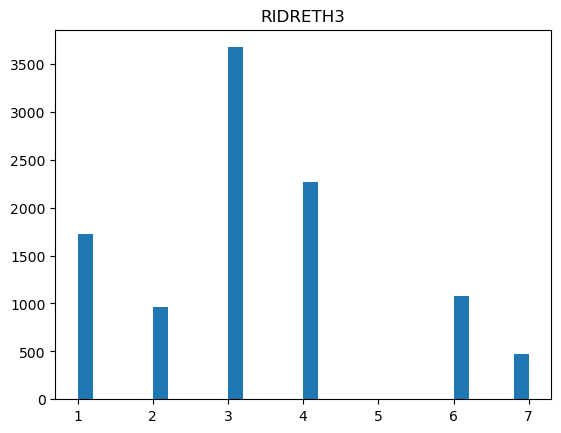

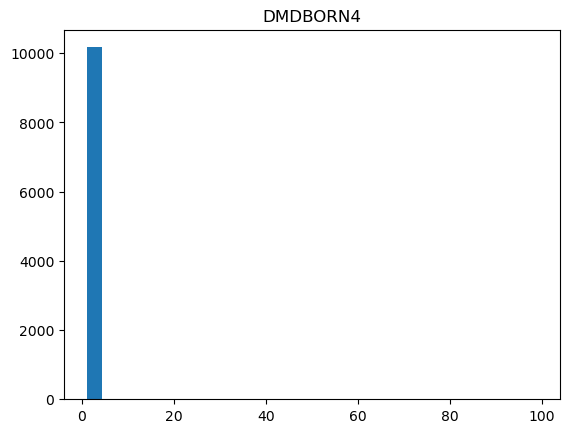

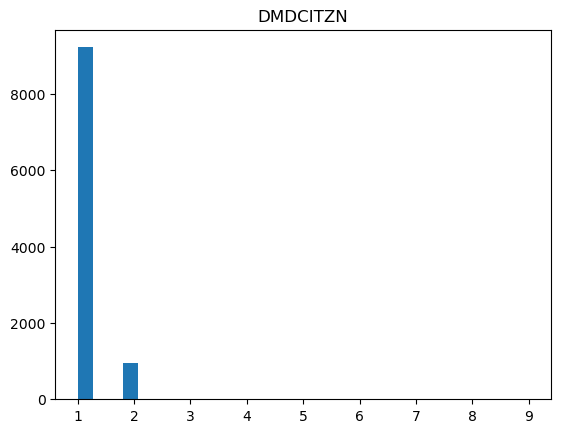

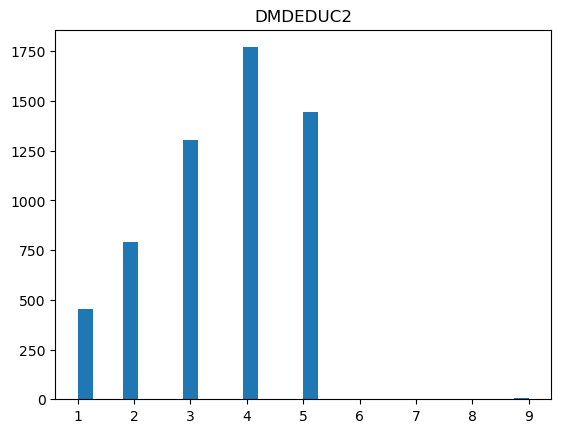

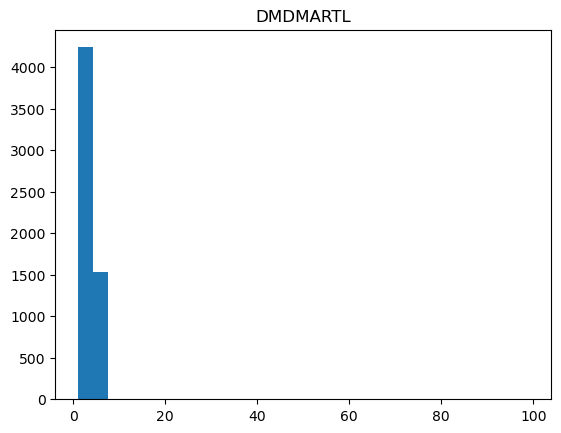

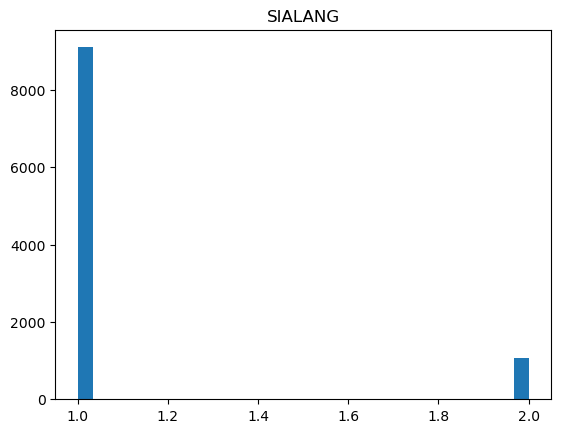

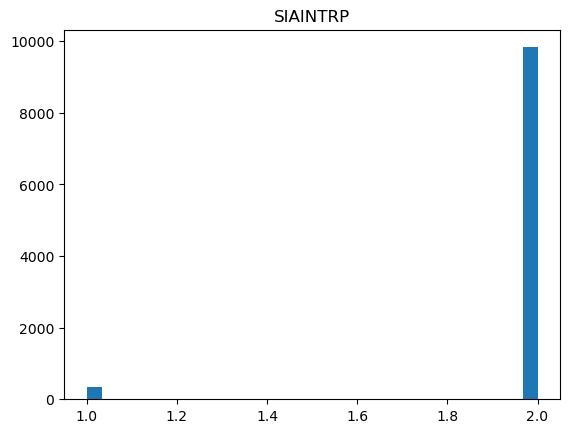

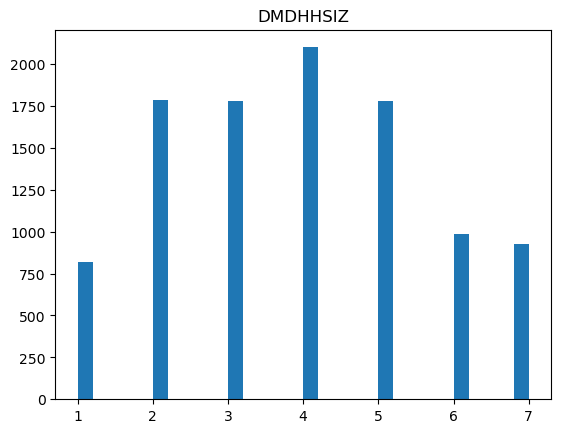

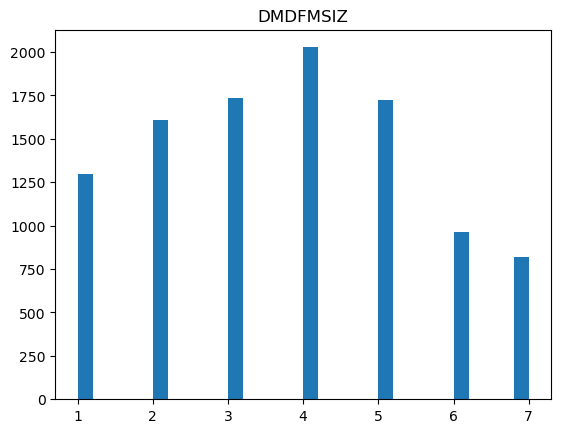

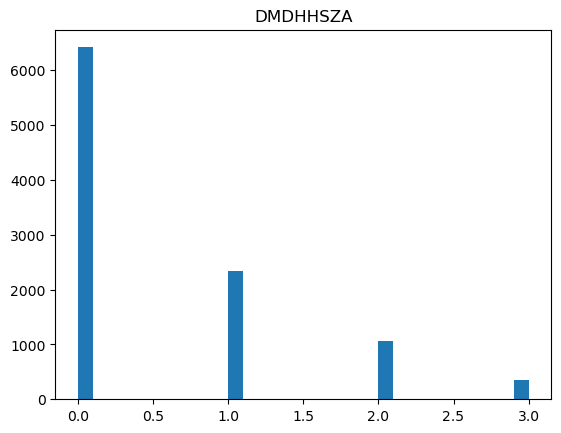

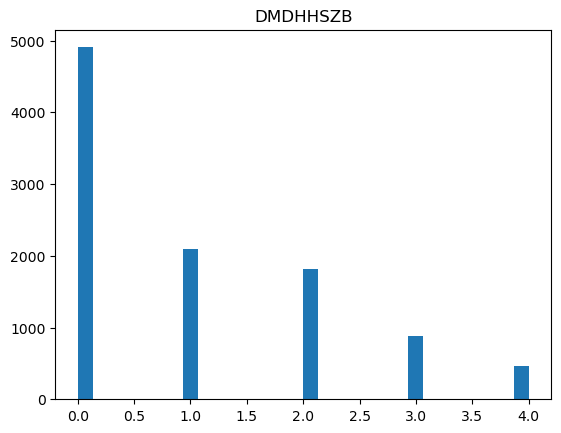

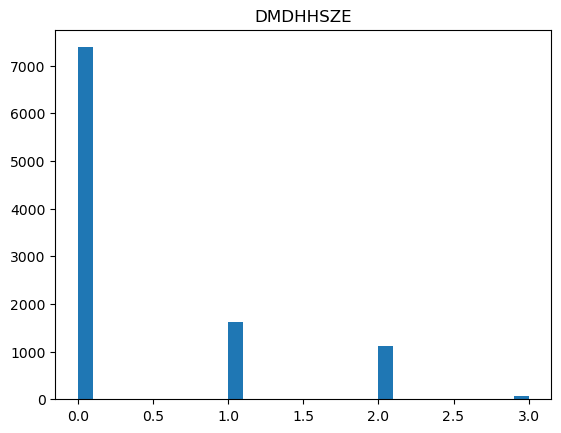

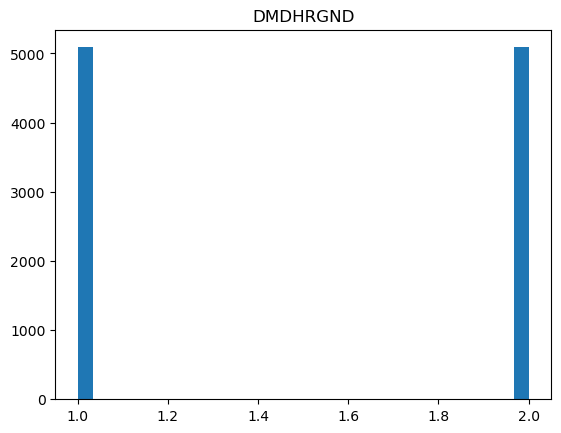

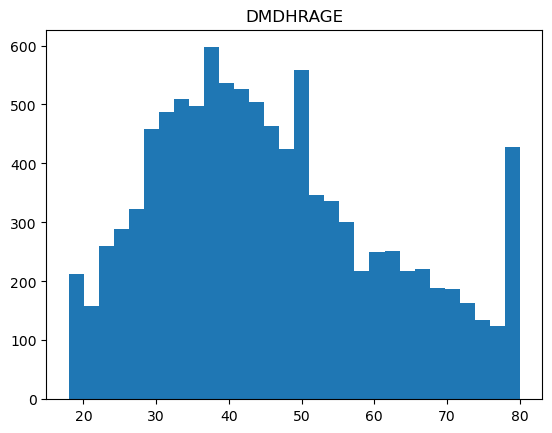

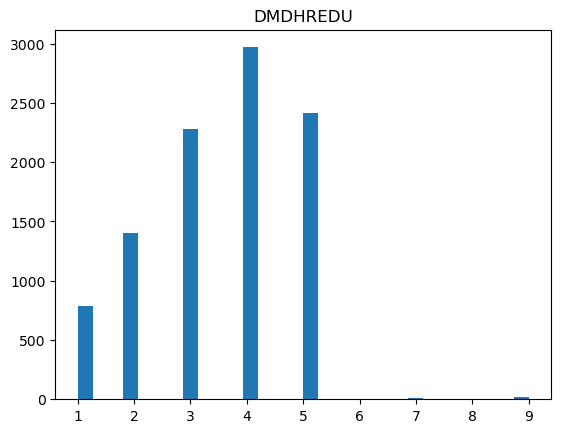

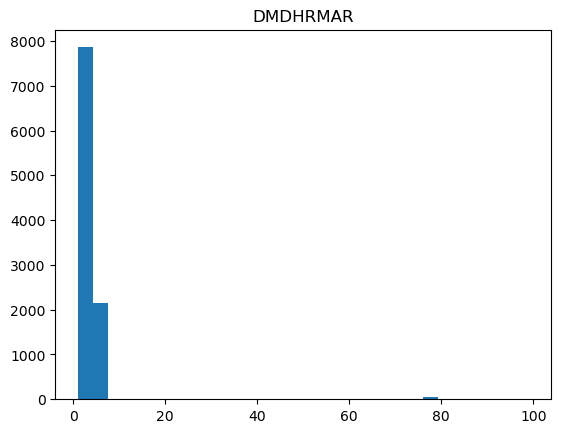

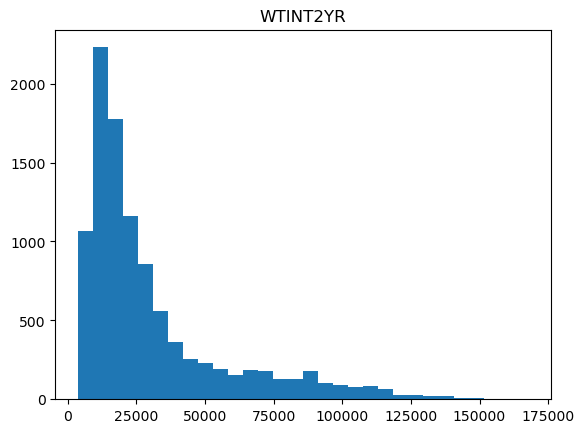

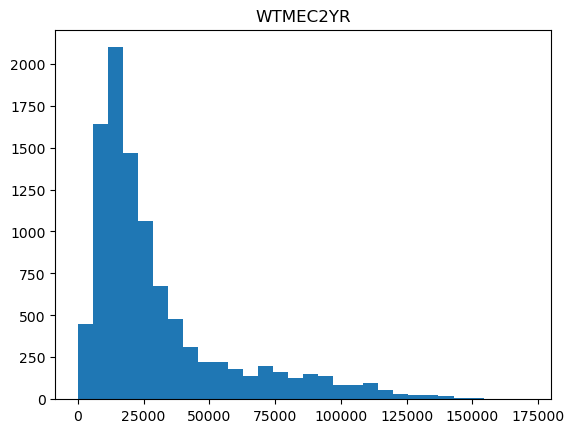

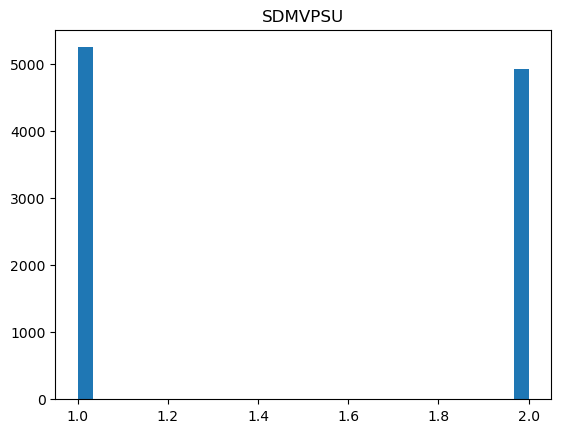

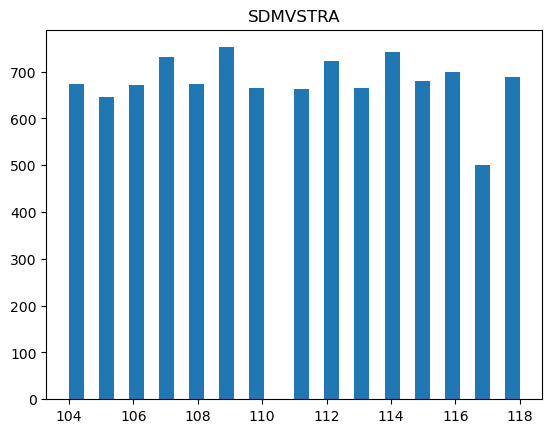

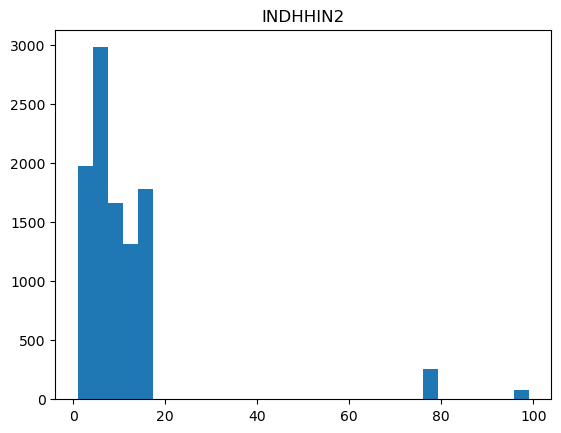

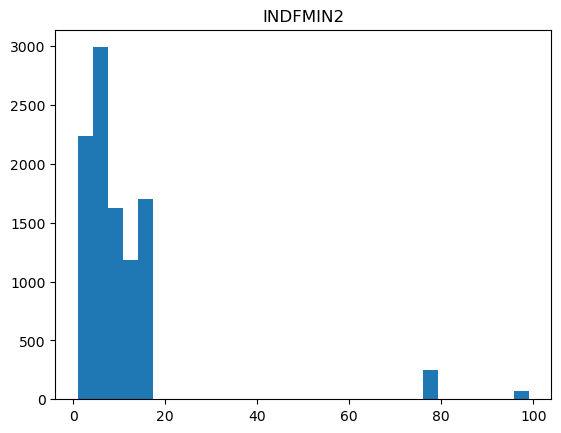

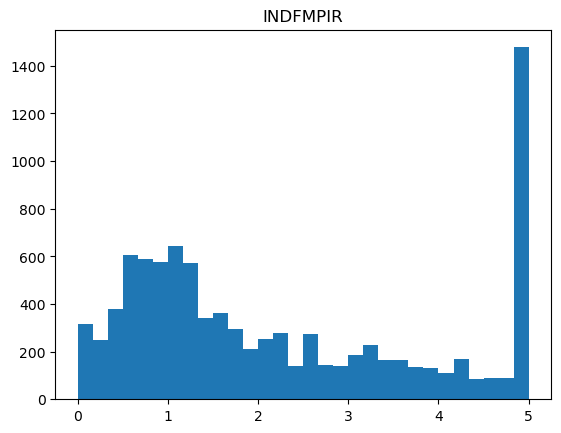

In [19]:
# creating for loop to create histogram of all columns
col = demographic_df_clean.select_dtypes("number").drop(columns='SEQN')
for column in col.columns:
    plt.figure()
    plt.hist(demographic_df_clean[column], bins = 30) #used 30 as default 
    plt.title(column)
    plt.show()

In [20]:
# Listing nulls of columns
demographic_df_clean.isna().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
RIDRETH3       0
DMDBORN4       0
DMDCITZN       4
DMDEDUC2    4406
DMDMARTL    4406
SIALANG        0
SIAINTRP       0
DMDHHSIZ       0
DMDFMSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGE       0
DMDHREDU     294
DMDHRMAR     123
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     133
INDFMIN2     123
INDFMPIR     785
dtype: int64

##### Let's deal with nulls for the following columns:
DMDEDUC2    
DMDMARTL              
INDFMPIR             
DMDHREDU     
DMDHRMAR     
INDFMIN2     
INDHHIN2        
DMDCITZN       

In [24]:
nullcol = demographic_df_clean[['DMDEDUC2','DMDMARTL','INDFMPIR','DMDHREDU',
'DMDHRMAR','INDFMIN2','INDHHIN2','DMDCITZN']]

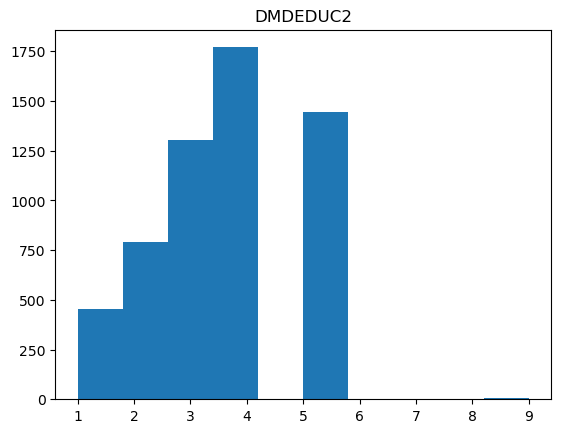

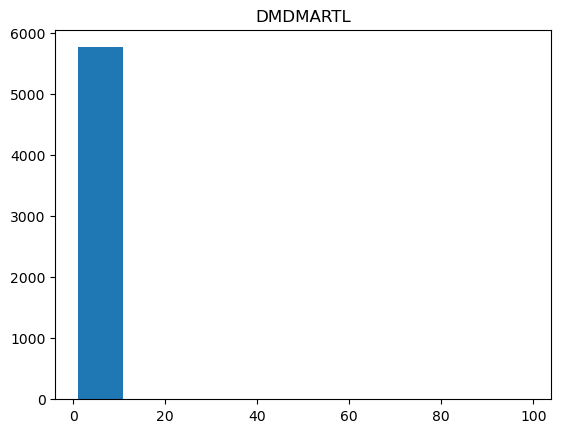

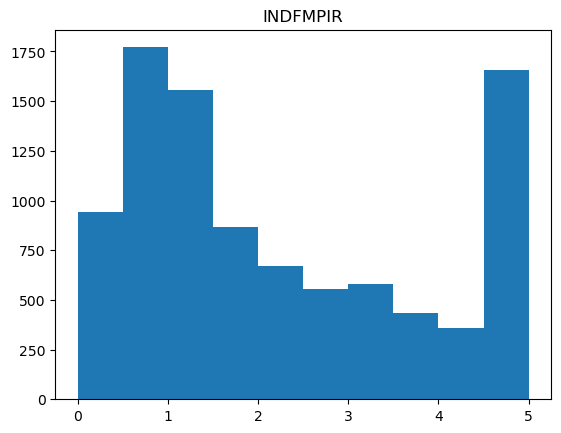

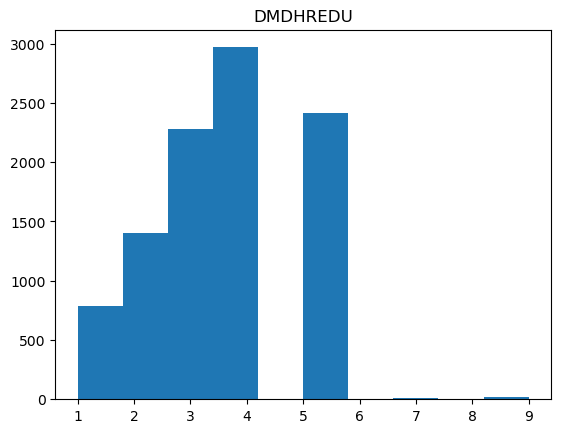

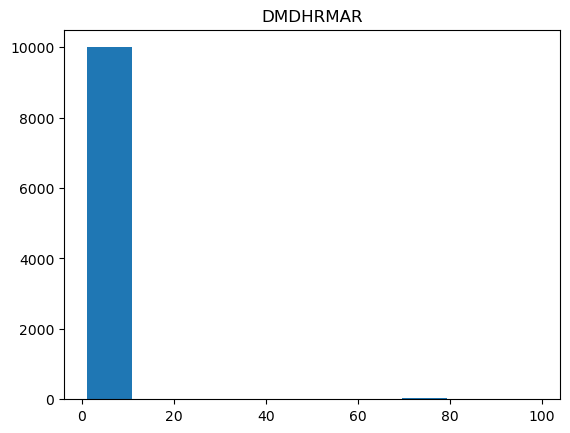

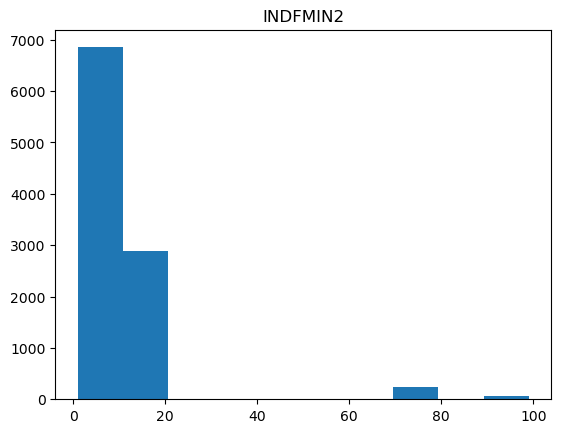

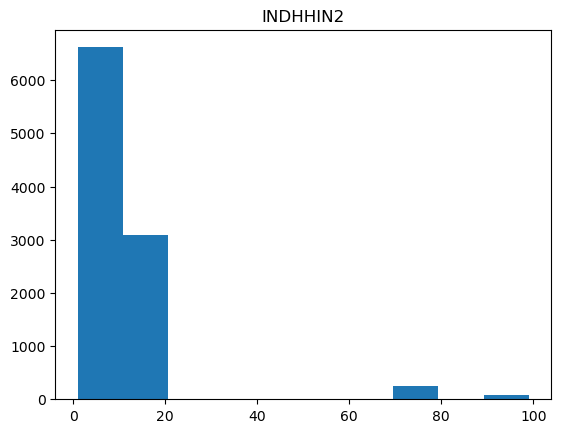

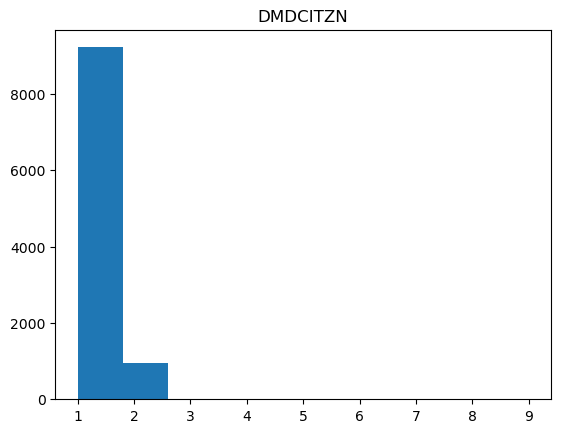

In [26]:
# creating for loop to create histogram of columns with null values
for column in nullcol.columns:
    plt.figure()
    plt.hist(demographic_df_clean[column], bins = 10) #using smaller bins  
    plt.title(column)
    plt.show()

In [27]:
# imputing nulls in the "Don't Know" category encoded as '9'
nullcolumns9 = demographic_df_clean[['DMDEDUC2','DMDHREDU','DMDCITZN']]
for column in nullcolumns9:
    demographic_df_clean[column].fillna(9,inplace=True)

In [30]:
# imputing nulls in the "Don't Know" category encoded as '99'
nullcolumns99 = demographic_df_clean[['DMDMARTL','DMDHRMAR','INDFMIN2','INDHHIN2']]
for column in nullcolumns99:
    demographic_df_clean[column].fillna(99,inplace=True)

In [32]:
# checking if columns have been imputed
demographic_df_clean.isna().sum()

SEQN          0
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
RIDRETH3      0
DMDBORN4      0
DMDCITZN      0
DMDEDUC2      0
DMDMARTL      0
SIALANG       0
SIAINTRP      0
DMDHHSIZ      0
DMDFMSIZ      0
DMDHHSZA      0
DMDHHSZB      0
DMDHHSZE      0
DMDHRGND      0
DMDHRAGE      0
DMDHREDU      0
DMDHRMAR      0
WTINT2YR      0
WTMEC2YR      0
SDMVPSU       0
SDMVSTRA      0
INDHHIN2      0
INDFMIN2      0
INDFMPIR    785
dtype: int64

In [34]:
#for INDFMPIR, imputing the nulls randomly from observed column values 
#because of uniform distribution

df= demographic_df_clean['INDFMPIR']
def rand_impute(df,column):
    observed_values = df[column].dropna()
    df[column] = df[column].apply(lambda x: np.random.choice(observed_values) if np.isnan(x) else x)
    return df

In [36]:
#calling random impute function, filling in nulls 
df_impute = rand_impute(demographic_df_clean,'INDFMPIR')

In [38]:
# making sure there are no null values in every column 
demographic_df_clean.isna().sum()

SEQN        0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
RIDRETH3    0
DMDBORN4    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
SIALANG     0
SIAINTRP    0
DMDHHSIZ    0
DMDFMSIZ    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
DMDHRAGE    0
DMDHREDU    0
DMDHRMAR    0
WTINT2YR    0
WTMEC2YR    0
SDMVPSU     0
SDMVSTRA    0
INDHHIN2    0
INDFMIN2    0
INDFMPIR    0
dtype: int64

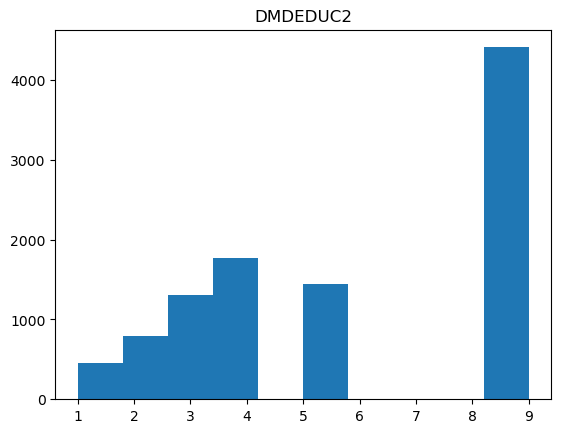

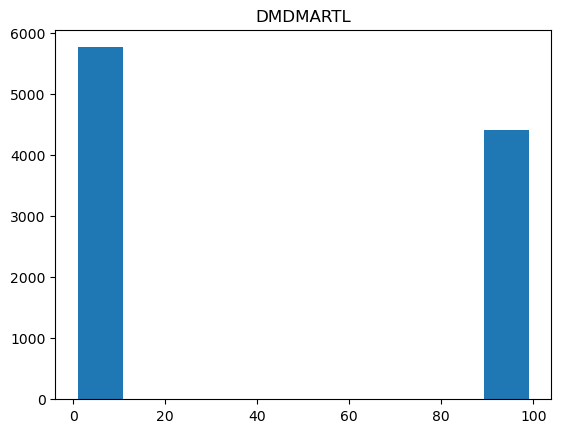

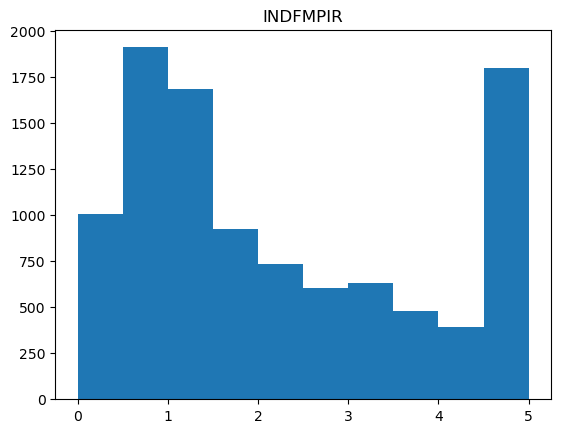

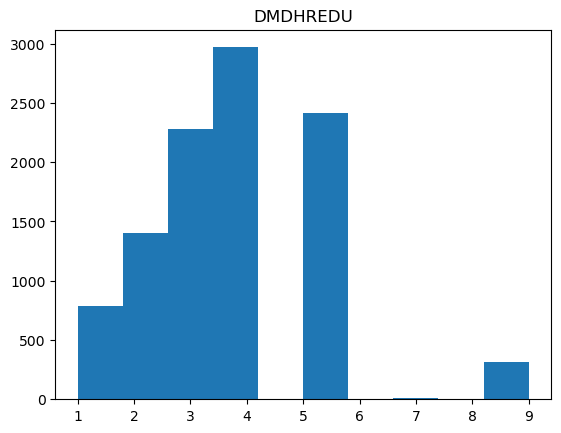

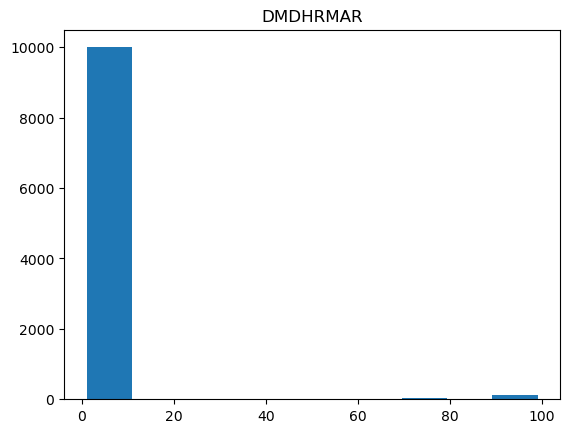

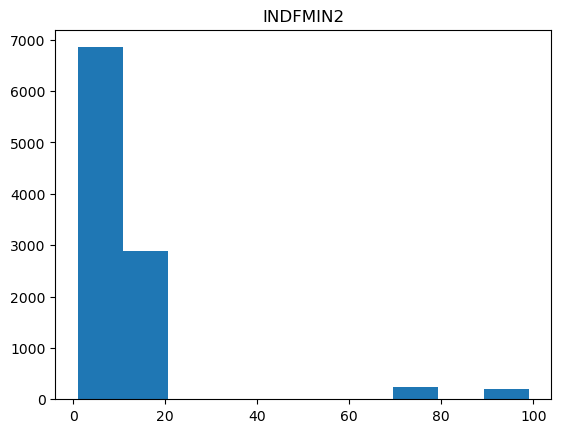

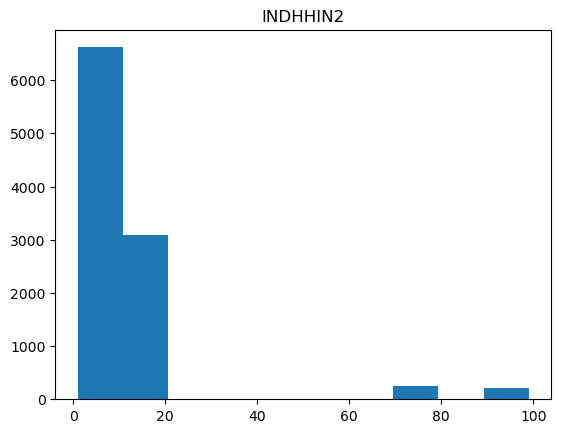

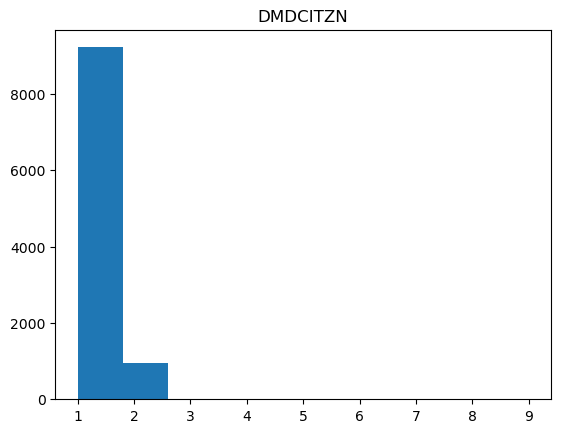

In [40]:
#checking distribution again for columns with null values
for column in nullcol.columns:
    plt.figure()
    plt.hist(demographic_df_clean[column], bins = 10) #using smaller bins  
    plt.title(column)
    plt.show()

In [42]:
demographic_df_clean.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,...,DMDHRAGE,DMDHREDU,DMDHRMAR,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,1,69,4,4,1,1.0,3.0,4.0,1,...,69,3.0,4.0,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,1,54,3,3,1,1.0,3.0,1.0,1,...,54,3.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,1,72,3,3,1,1.0,4.0,1.0,1,...,72,4.0,1.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,1,9,3,3,1,1.0,9.0,99.0,1,...,33,3.0,1.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,2,73,3,3,1,1.0,5.0,1.0,1,...,78,5.0,1.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


#### Scaling Clean Demographic Data

In [36]:
##Scaling Clean Demographic Data
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(ptdemodf2)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_ptdemodf2_data = my_standard_scaler.transform(ptdemodf2)


scaled_ptdemodf2 = pd.DataFrame(columns=ptdemodf2.columns, data=scaled_ptdemodf2_data)
scaled_ptdemodf2.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,...,DMDHRAGE,DMDHREDU,DMDHRMAR,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,-1.731881,-1.016750,1.536248,0.718871,0.440236,-0.124028,-0.268175,-1.007443,-0.843308,-0.343703,...,1.473779,-0.429706,0.008397,-0.642145,-0.612182,-0.968744,0.251900,-0.471733,-0.454863,-0.866549
1,-1.731540,-1.016750,0.922009,-0.072743,-0.179665,-0.124028,-0.268175,-1.007443,-0.906043,-0.343703,...,0.514382,-0.429706,-0.240465,-0.256173,-0.218808,-0.968744,-0.687043,-0.295642,-0.274737,-0.292699
2,-1.731200,-1.016750,1.659096,-0.072743,-0.179665,-0.124028,-0.268175,-0.659122,-0.906043,-0.343703,...,1.665659,0.220154,-0.240465,0.988218,0.952343,-0.968744,-0.452307,-0.119551,-0.094610,1.373906
3,-1.730859,-1.016750,-0.920709,-0.072743,-0.179665,-0.124028,-0.268175,1.082482,1.143290,-0.343703,...,-0.828775,-0.429706,-0.240465,0.913493,0.901276,1.032265,-0.452307,-0.178248,-0.154652,0.159054
4,-1.730519,0.983526,1.700045,-0.072743,-0.179665,-0.124028,-0.268175,-0.310802,-0.906043,-0.343703,...,2.049418,0.870013,-0.240465,1.229241,1.251151,1.032265,1.190842,0.173933,0.205601,1.673040


#### Clustering Demographic Data

In [237]:
X = scaled_ptdemodf2
scaler = StandardScaler()
Xscaled = scaler.fit(X).transform(X)

In [239]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_ptdemodf2)
cluster_labels = kmeans.predict(Xscaled)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


In [241]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled)
in2d = pca.transform(Xscaled)

Text(0.5, 1.0, 'Clustering Demographic Features')

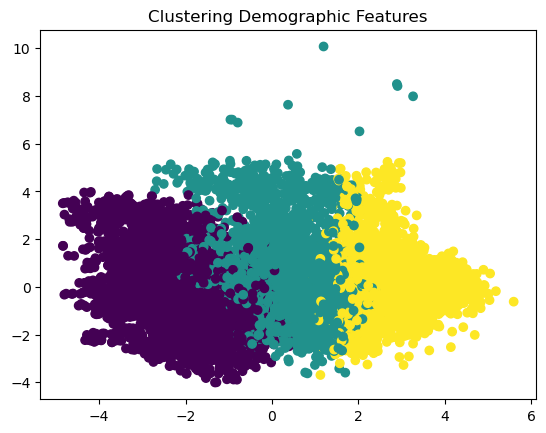

In [243]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels)
plt.title('Clustering Demographic Features')

In [229]:
pd.DataFrame(Xscaled,columns=X.columns).groupby(cluster_labels).mean().T

,0,1,2
SEQN,0.091850,0.323881,-0.299158
LBXSCA,-0.061847,-0.076350,0.088523
LBXSCH,1.081918,-0.171316,-0.348056
LBXSCR,0.164112,-0.104789,0.009984
LBXSNASI,-0.156705,-0.068082,0.124418
LBXSTP,-0.224392,0.029954,0.076631
LBXSTR,0.624866,-0.158703,-0.153414
LBXWBCSI,0.088752,0.239314,-0.230400
LBXRBCSI,-0.006596,-0.159104,0.129706
LBXHGB,0.472411,-0.744312,0.381395


### Cleaning Questionnaire Dataset

In [204]:
# importing questionnaire data 
quest_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Original_Data/questionnaire.csv')
quest_df.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [47]:
#viewing questionnaire shape 
quest_df.shape

(10175, 953)

#### Addressing Nulls
Reviewing/researching columns from questionnaire dataset 

In [50]:
quest_df.isna().sum()

SEQN           0
ACD011A     4416
ACD011B    10159
ACD011C    10004
ACD040      7801
           ...  
WHD140      4072
WHQ150      4155
WHQ030M     8697
WHQ500      8697
WHQ520      8697
Length: 953, dtype: int64

In [52]:
#Creating new df for questionnaire dataset
quest_df_clean = quest_df[['SEQN', 'BPQ020','BPQ080','DIQ010', 'DIQ170', 
'DIQ050','SMQ020','ALQ101','PAQ605', 'PAQ620','PAQ650', 
'PAQ665','DPQ010','DPQ020','MCQ160B','MCQ160C','MCQ160D', 
'MCQ160E', 'MCQ160F','MCQ300A','MCQ370A','MCQ370B',
'MCQ370C','MCQ370D','HIQ011']].copy()

In [54]:
quest_df_clean.head()

,SEQN,BPQ020,BPQ080,DIQ010,DIQ170,DIQ050,SMQ020,ALQ101,PAQ605,PAQ620,...,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ300A,MCQ370A,MCQ370B,MCQ370C,MCQ370D,HIQ011
0,73557,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1
1,73558,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
2,73559,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1
3,73560,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,73561,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1


In [56]:
#checking for nulls, using for loop to print out null values in each column
for column in quest_df_clean.columns:
    null_count = quest_df_clean[column].isnull().sum()    
    print(f"{column}: {null_count} null values")

SEQN: 0 null values
BPQ020: 3711 null values
BPQ080: 3711 null values
DIQ010: 406 null values
DIQ170: 3706 null values
DIQ050: 407 null values
SMQ020: 4062 null values
ALQ101: 4754 null values
PAQ605: 3027 null values
PAQ620: 3027 null values
PAQ650: 3028 null values
PAQ665: 3030 null values
DPQ010: 4777 null values
DPQ020: 4779 null values
MCQ160B: 4406 null values
MCQ160C: 4406 null values
MCQ160D: 4406 null values
MCQ160E: 4406 null values
MCQ160F: 4406 null values
MCQ300A: 4406 null values
MCQ370A: 3711 null values
MCQ370B: 3711 null values
MCQ370C: 3711 null values
MCQ370D: 3711 null values
HIQ011: 0 null values


In [58]:
nullcols = quest_df_clean[['BPQ020','BPQ080','DIQ010','DIQ170','DIQ050',
                    'SMQ020','ALQ101','PAQ605','PAQ620','DPQ010','DPQ020',
                    'PAQ650','PAQ665','MCQ160B','MCQ160C','MCQ160D','MCQ160E',
                  'MCQ160F','MCQ300A','MCQ370A','MCQ370B','MCQ370C','MCQ370D']]

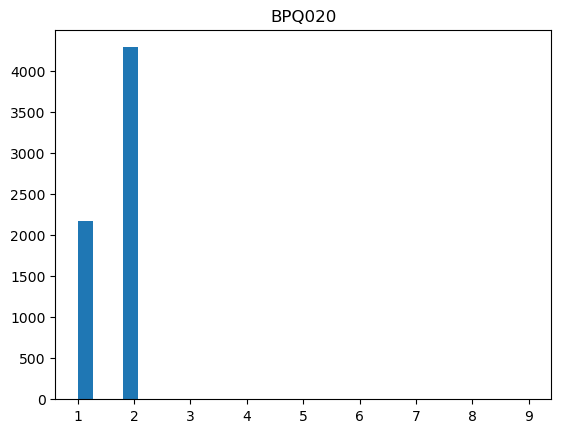

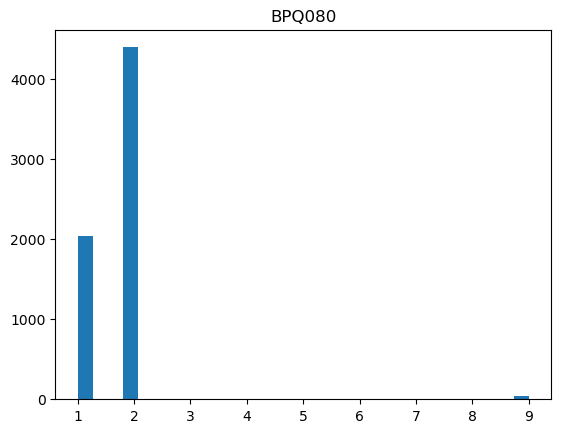

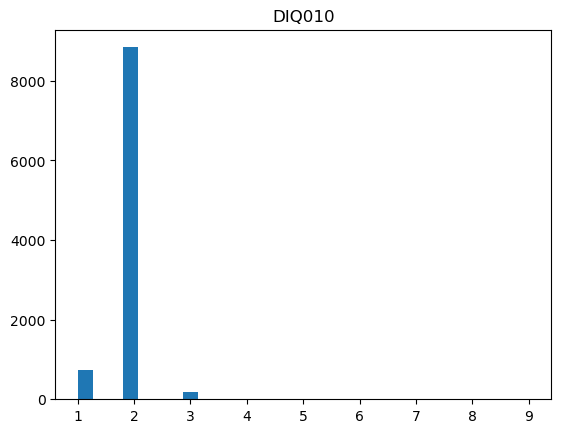

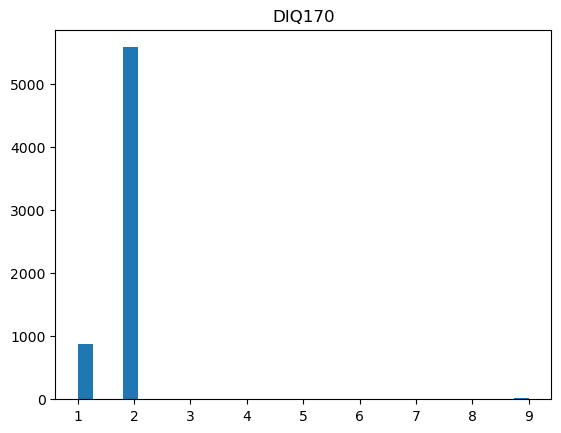

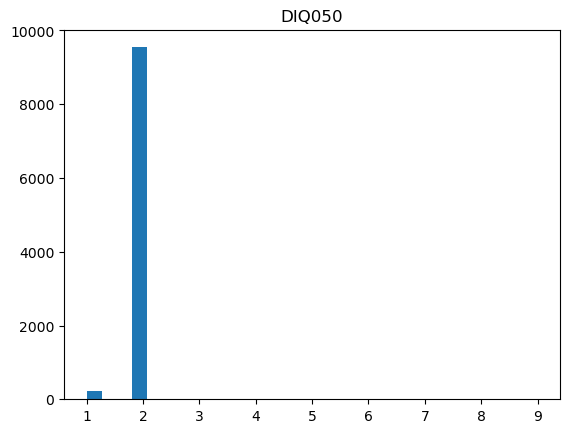

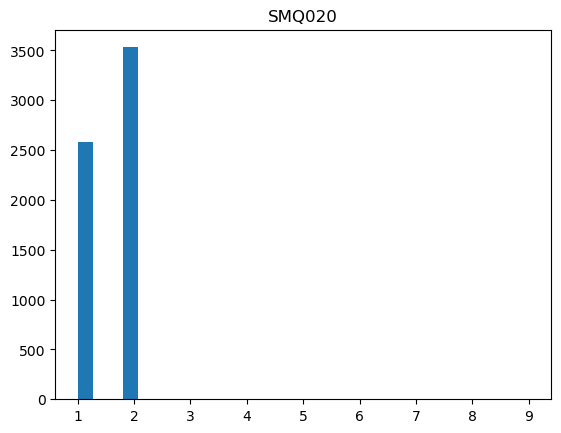

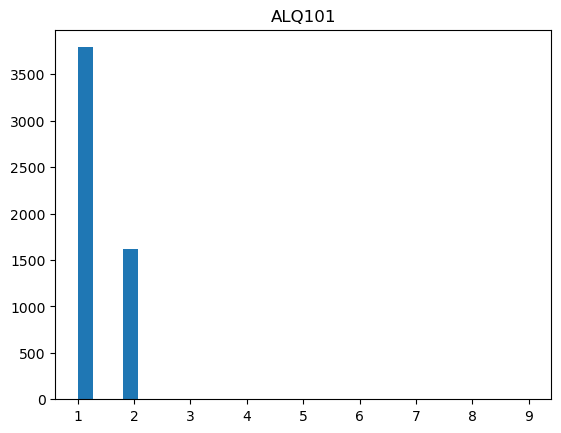

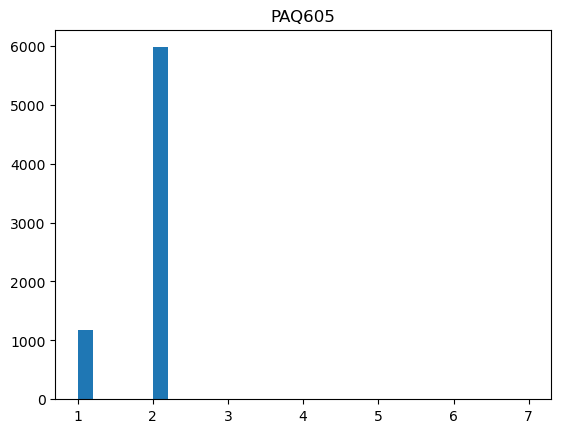

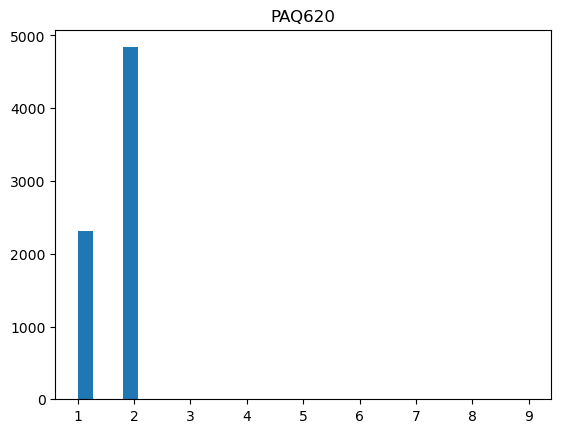

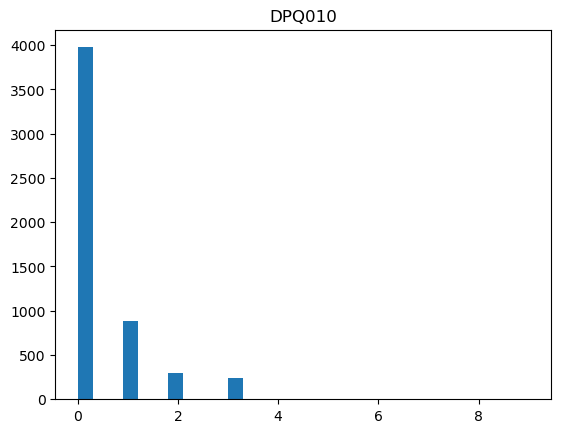

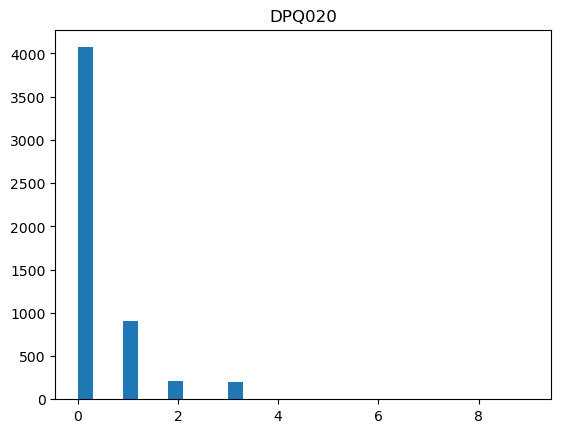

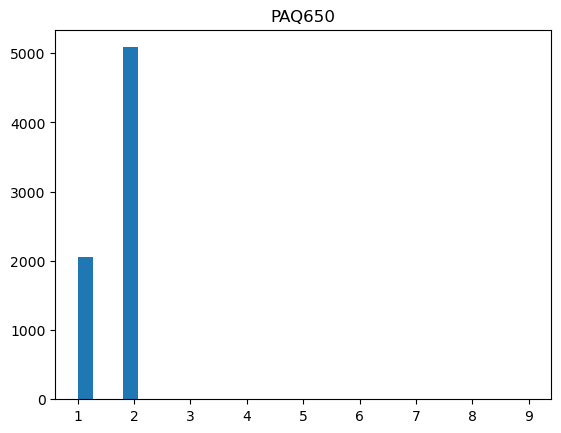

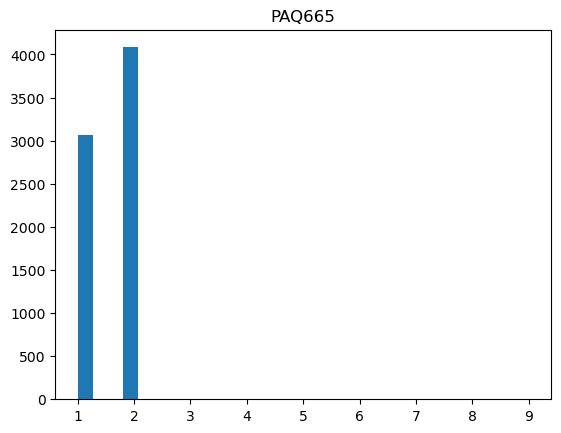

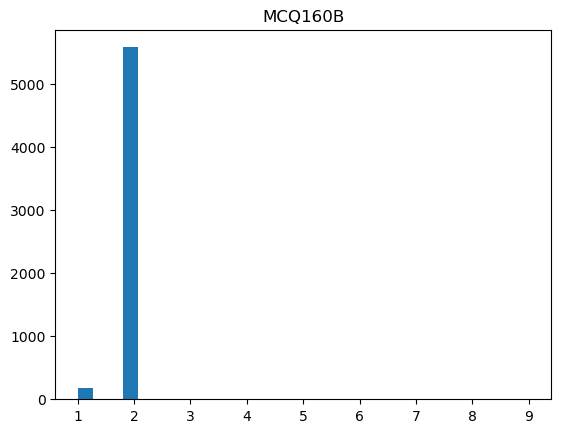

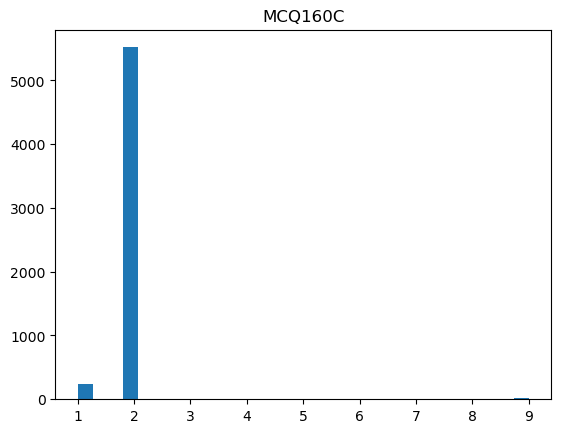

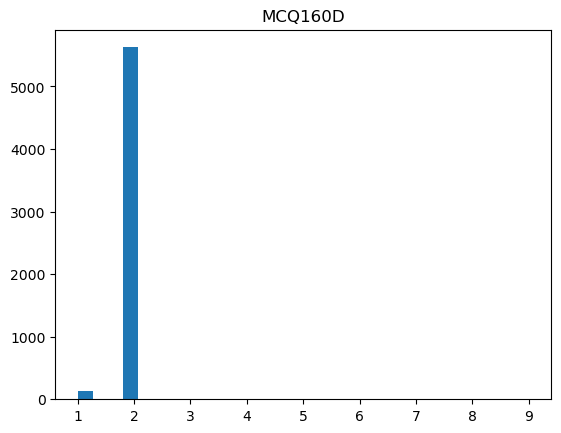

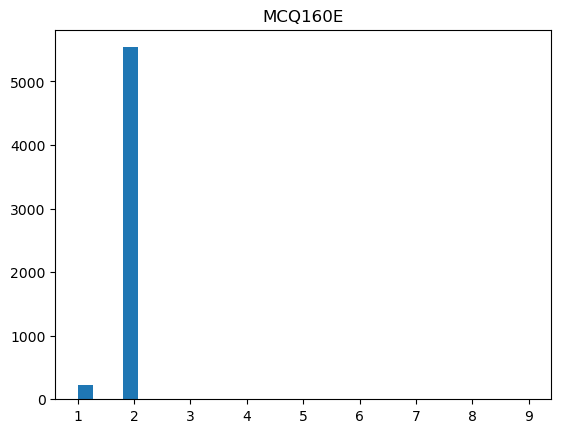

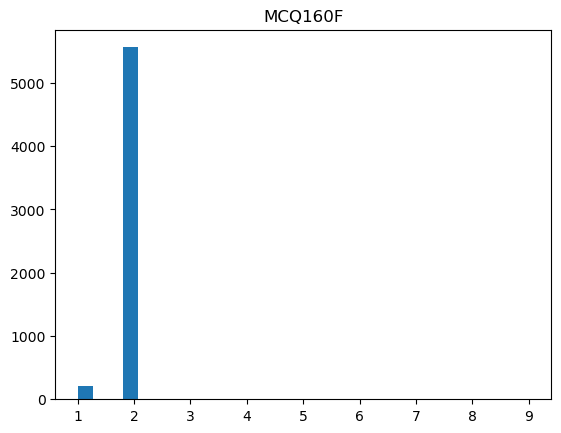

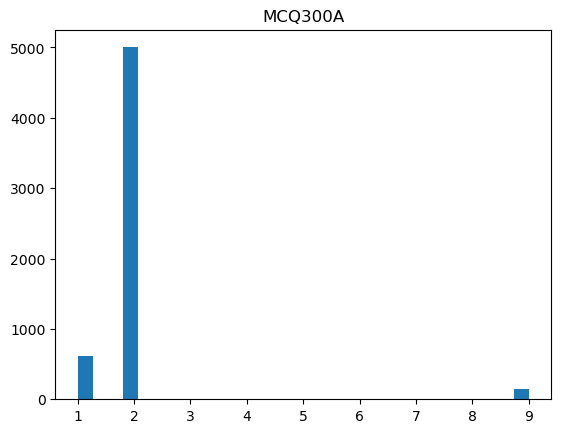

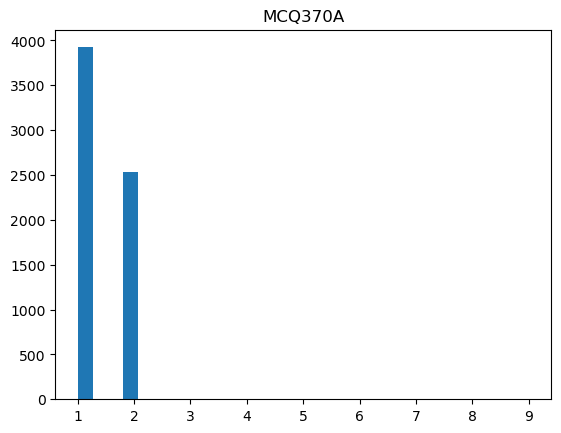

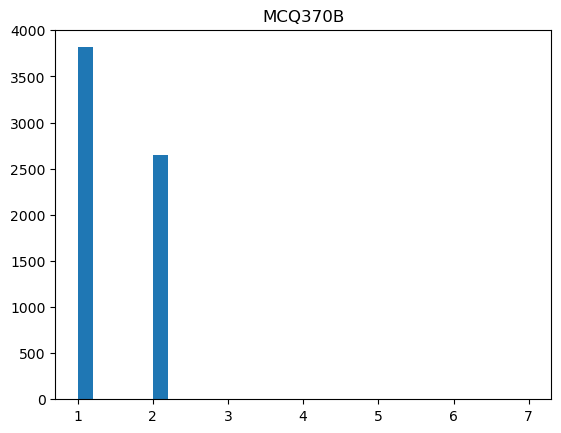

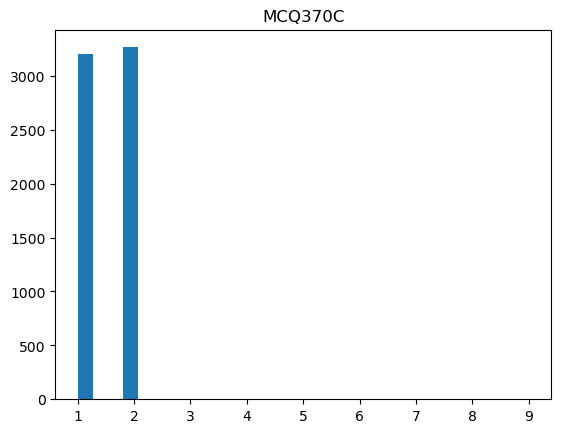

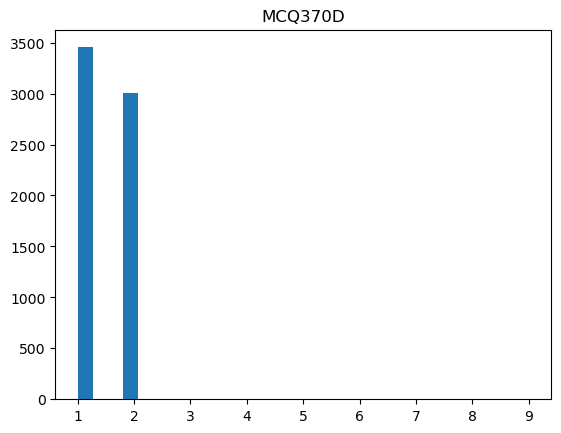

In [60]:
# creating for loop to create histogram of columns with null values
for column in nullcols.columns:
    plt.figure()
    plt.hist(quest_df_clean[column], bins = 30) #using default bins  
    plt.title(column)
    plt.show()

#### Imputation

In [62]:
#imputing all nulls in don't know category

#nullcolumns9 = ptdemodf2[['DMDEDUC2','DMDHREDU','DMDCITZN']]
#for column in nullcolumns9:
 #   ptdemodf2[column].fillna(9,inplace=True)
nullscolumns9 = quest_df_clean[['BPQ020','BPQ080','DIQ010','DIQ170','DIQ050',
                    'SMQ020','ALQ101','PAQ605','PAQ620','DPQ010','DPQ020',
                    'PAQ650','PAQ665','MCQ160B','MCQ160C','MCQ160D','MCQ160E',
                  'MCQ160F','MCQ300A','MCQ370A','MCQ370B','MCQ370C','MCQ370D']]
for column in nullscolumns9:
    quest_df_clean[column].fillna(9,inplace=True)

In [63]:
# making sure all nulls are addressed
quest_df_clean.isna().sum()

SEQN       0
BPQ020     0
BPQ080     0
DIQ010     0
DIQ170     0
DIQ050     0
SMQ020     0
ALQ101     0
PAQ605     0
PAQ620     0
PAQ650     0
PAQ665     0
DPQ010     0
DPQ020     0
MCQ160B    0
MCQ160C    0
MCQ160D    0
MCQ160E    0
MCQ160F    0
MCQ300A    0
MCQ370A    0
MCQ370B    0
MCQ370C    0
MCQ370D    0
HIQ011     0
dtype: int64

In [275]:
##Scaling Clean Demographic Data
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(ptquestdf2)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_ptquestdf2_data = my_standard_scaler.transform(ptquestdf2)

scaled_ptquestdf2 = pd.DataFrame(columns=ptquestdf2.columns, data=scaled_ptquestdf2_data)
scaled_ptquestdf2.head()

,SEQN,BPQ020,BPQ080,DIQ010,DIQ170,DIQ050,SMQ020,ALQ101,PAQ605,PAQ620,...,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ300A,MCQ370A,MCQ370B,MCQ370C,MCQ370D,HIQ011
0,-1.731881,-0.940974,-0.951840,-0.864738,1.311770,-0.908090,-0.969133,-1.012157,-0.598142,-0.550968,...,-0.864738,-0.868072,-0.862243,-1.150675,-0.866223,-0.860714,-0.592843,-0.892580,-0.607296,-0.373586
1,-1.731540,-0.940974,-0.951840,-0.864738,1.311770,-0.908090,-0.969133,-1.012157,-0.598142,-0.847588,...,-0.864738,-0.868072,-0.862243,-0.864063,-0.866223,-0.589198,-0.592843,-0.617084,-0.607296,1.927405
2,-1.731200,-0.940974,-0.951840,-0.864738,1.311770,-0.908090,-0.969133,-1.012157,-0.598142,-0.847588,...,-0.864738,-0.868072,-0.862243,-0.864063,-1.148464,-0.589198,-0.592843,-0.617084,-0.607296,-0.373586
3,-1.730859,1.310968,1.302641,-0.161123,1.311770,-0.187524,1.219510,1.062155,1.529651,1.525366,...,1.139133,1.141824,1.142564,1.142224,1.109464,1.311419,1.312112,1.311388,1.310956,-0.373586
4,-1.730519,-0.940974,-0.670029,-0.161123,-0.718319,-0.187524,-0.695553,-1.012157,-0.598142,-0.847588,...,-0.864738,-0.868072,-0.862243,-0.864063,-1.148464,-0.860714,-0.592843,-0.617084,-0.607296,-0.373586


In [299]:
Xquest = scaled_ptquestdf2
scaler = StandardScaler()
Xscaled = scaler.fit(X).transform(X)

In [301]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_ptquestdf2)
cluster_labels = kmeans.predict(Xscaled)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


In [303]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled)
in2d = pca.transform(Xscaled)

Text(0.5, 1.0, 'Clustering Questionnaire Features')

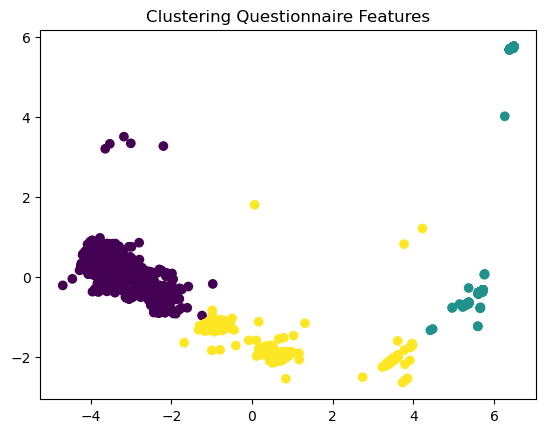

In [305]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels)
plt.title('Clustering Questionnaire Features')

In [214]:
pd.DataFrame(Xscaled,columns=X.columns).groupby(cluster_labels).mean()

NameError: name 'Xscaled' is not defined

In [ ]:
QuestDfclusterlabels = pd.DataFrame(Xscaled,columns=X.columns).groupby(cluster_labels).mean()

In [309]:
from sklearn.linear_model import LogisticRegression

In [315]:
lr = LogisticRegression()
lr.fit(Xquest,cluster_labels)
lr.score(X,cluster_labels)

1.0

In [317]:
lr.coef_

array([[-0.25756138, -0.10438615, -0.19647049, -0.08240578,  0.22339871,
        -0.19416333, -0.28367705, -0.17691497, -0.05628794, -0.12913315,
        -0.03630093, -0.05820245, -0.1589475 , -0.14491492, -0.79313013,
        -0.7747837 , -0.82390326, -0.54082702, -0.54279319, -1.07244912,
        -0.17689033, -0.05304686, -0.17284901, -0.1590459 , -0.01457419],
       [-0.00189032,  0.16646257,  0.16489946,  0.100466  ,  0.41383745,
         0.09537635,  0.12094449,  0.07929545,  0.6741452 ,  0.64724783,
         1.18331982,  1.01919006,  0.07957989,  0.08010315,  0.05216004,
         0.0505456 ,  0.05176243,  0.0693904 ,  0.07047973,  0.04634141,
         0.16502384,  0.16588703,  0.16546492,  0.16507516, -0.02882346],
       [ 0.25945171, -0.06207642,  0.03157102, -0.01806022, -0.63723616,
         0.09878698,  0.16273256,  0.09761951, -0.61785726, -0.51811468,
        -1.14701889, -0.96098761,  0.07936761,  0.06481177,  0.74097009,
         0.7242381 ,  0.77214083,  0.47143662,  0

In [319]:
Xquest["cluster_lab"]=cluster_labels
Xquest.to_csv("Xquest_save.csv")

### Cleaning Labs Dataset 

In [206]:
# importing lab data 
labs_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Original_Data/labs.csv')
labs_df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [69]:
#viewing lab data shape
labs_df.shape

(9813, 424)

#### Addressing Nulls

In [72]:
delcol = labs_df.columns[labs_df.isnull().sum()>=5000]
print(list(delcol))

['WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'URXUCL', 'WTSA2YR.x', 'LBXSCU', 'LBDSCUSI', 'LBXSSE', 'LBDSSESI', 'LBXSZN', 'LBDSZNSI', 'URXUCR.y', 'WTSB2YR.x', 'URXBP3', 'URDBP3LC', 'URXBPH', 'URDBPHLC', 'URXBPF', 'URDBPFLC', 'URXBPS', 'URDBPSLC', 'URXTLC', 'URDTLCLC', 'URXTRS', 'URDTRSLC', 'URXBUP', 'URDBUPLC', 'URXEPB', 'URDEPBLC', 'URXMPB', 'URDMPBLC', 'URXPPB', 'URDPPBLC', 'URX14D', 'URD14DLC', 'URXDCB', 'URDDCBLC', 'URXUCR', 'PHACOFHR', 'PHACOFMN', 'PHAALCHR', 'PHAALCMN', 'PHAGUMHR', 'PHAGUMMN', 'PHAANTHR', 'PHAANTMN', 'PHASUPHR', 'PHASUPMN', 'LBDPFL', 'LBDWFL', 'LBXHCR', 'LBXHCG', 'LBXHE1', 'LBXHE2', 'LBDHI', 'LBDRPCR.x', 'LBDRHP.x', 'LBDRLP.x', 'LBDR06.x', 'LBDR11.x', 'LBDR16.x', 'LBDR18.x', 'LBDR26.x', 'LBDR31.x', 'LBDR33.x', 'LBDR35.x', 'LBDR39.x', 'LBDR40.x', 'LBDR42.x', 'LBDR45.x', 'LBDR51.x', 'LBDR52.x', 'LBDR53.x', 'LBDR54.x', 'LBDR55.x', 'LBDR56.x', 'LBDR58.x', 'LBDR59.x', 'LBDR61.x', 'LBDR62.x', 'LBDR64.x', 'LBDR66.x', 'LBDR67.x', 'LBDR68.x', 'LBDR69.x', 'LBDR70.x', 'LBDR71.x', '

In [74]:
# dropping columns with null values >= 5000
labs_df_clean = labs_df.drop(columns=delcol)

In [76]:
labs_df_clean

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,4.1,41.0,129.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,4.7,47.0,97.0,18.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,3.7,37.0,99.0,22.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,4.3,43.0,78.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,4.9,49.0,75.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.462,720.0,531.4
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,173.87,2.21,0.0,12.64,230.05,0.0,NaN,NaN,NaN,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,4.1,41.0,65.0,26.0,...,228.46,2.90,0.0,10.33,188.01,0.0,73.0,0.619,388.0,286.3
9811,83730,4.5,4.5,86.0,7602.4,5.23,NaN,NaN,NaN,NaN,...,179.73,2.28,0.0,11.04,200.93,0.0,122.0,NaN,NaN,NaN


In [78]:
labs_df_clean.isna().sum()

SEQN           0
URXUMA      1761
URXUMS      1761
URXUCR.x    1761
URXCRS      1761
            ... 
LBDBMNLC    4598
URXVOL1     1756
URDFLOW1    2663
LBDB12      4497
LBDB12SI    4497
Length: 152, dtype: int64

In [80]:
#removing columns starting with orxh,lbd,phq,urxv and ending in pct
dropcol = labs_df_clean.filter(regex='^ORXH|^LBD|^PHQ|^URXV|PCT$').columns
labs_df_clean = labs_df_clean.drop(columns=dropcol)
labs_df_clean

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,...,LBXBGM,LBXTC,LBXTTG,WTSH2YR.y,LBXBPB,LBXBCD,LBXTHG,LBXBSE,LBXBMN,URDFLOW1
0,73557,4.3,4.3,39.0,3447.6,11.03,4.1,129.0,16.0,16.0,...,NaN,167.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.821
1,73558,153.0,153.0,50.0,4420.0,306.00,4.7,97.0,18.0,29.0,...,1.13,170.0,2.0,49123.400015,1.69,0.20,1.21,204.73,8.15,1.636
2,73559,11.9,11.9,113.0,9989.2,10.53,3.7,99.0,22.0,16.0,...,0.91,126.0,2.0,115794.742161,1.45,0.22,1.27,209.64,9.57,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.40,168.0,2.0,55766.512438,0.37,0.07,0.88,169.82,13.07,0.575
4,73561,255.0,255.0,147.0,12994.8,173.47,4.3,78.0,36.0,28.0,...,NaN,201.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,4.9,75.0,27.0,26.0,...,NaN,190.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.462
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,NaN,NaN,16512.138781,0.35,0.07,0.20,173.87,12.64,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,4.1,65.0,26.0,13.0,...,0.80,152.0,2.0,57969.212582,0.80,0.63,6.50,228.46,10.33,0.619
9811,83730,4.5,4.5,86.0,7602.4,5.23,NaN,NaN,NaN,NaN,...,0.80,167.0,2.0,26686.025573,0.73,0.11,1.03,179.73,11.04,NaN


In [82]:
# dropping nonrelevant columns
labs_df_clean.drop(columns=['URXUMA', 'URXUMS', 'URXUCR.x', 'URDACT', 
 'LBXSAL', 'LBXSAPSI','LBXSASSI',
 'LBXSATSI', 'LBXSBU', 'LBXSC3SI', 'URXCRS', 'LBXSCK', 'LBXSGB', 'LBXSGTSI',
 'LBXSKSI', 'LBXSLDSI', 'LBXSIR', 'LBXSPH',  'PHAFSTHR.x','PHAFSTMN.x',
 'URDFLOW1',  'LBXBMN', 'LBXBSE', 'LBXTHG', 'LBXBCD', 'LBXBPB',  'LBXTTG',
 'LBXBGM', 'LBXBGE', 'LBXIHG',  'ORXGL', 'ORXGH', 'LBXHA','LBXHBS',
 'LBXHBC', 'PHDSESN',  'LBXMPSI', 'LBXSUA',  'LBXSTB', 'LBXSGL',
 'LBXSOSSI',  'LBXHCT',  'LBXMCVSI', 'LBXRDW', 'LBXSCLSI','WTSH2YR.x','WTSH2YR.y'], inplace=True)

In [84]:
# checking for nulls
labs_df_clean.isnull().sum()

SEQN           0
LBXSCA      3302
LBXSCH      3262
LBXSCR      3260
LBXSNASI    3260
LBXSTP      3269
LBXSTR      3264
LBXWBCSI    1269
LBXRBCSI    1269
LBXHGB      1269
LBXMCHSI    1269
LBXMC       1269
LBXPLTSI    1269
LBXGH       3170
LBXTC       2189
dtype: int64

In [86]:
#listing null columns in lab dataframe

nullabcol= labs_df_clean[['LBXSCA','LBXSCH','LBXSCR','LBXSNASI',     
'LBXSTP','LBXSTR','LBXWBCSI','LBXRBCSI', 'LBXHGB','LBXMCHSI',     
'LBXMC','LBXPLTSI','LBXGH','LBXTC']]

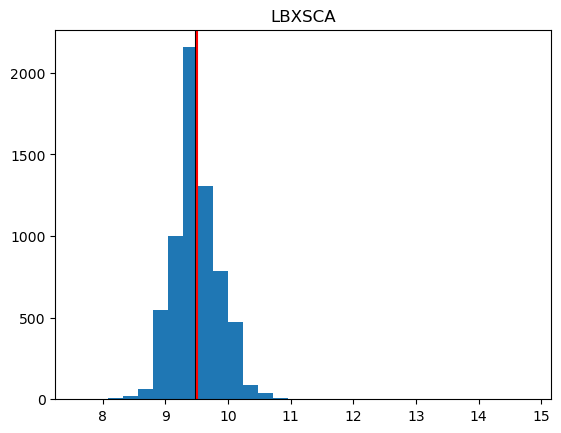

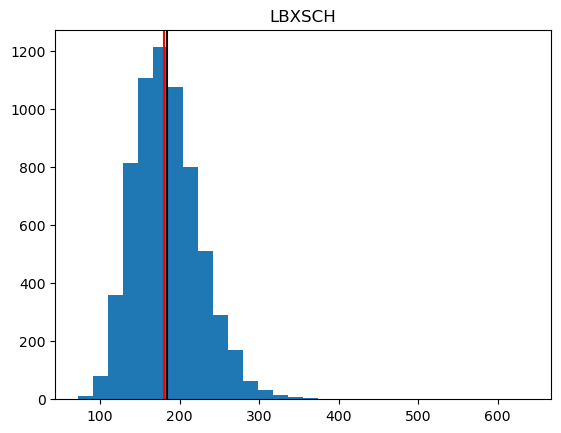

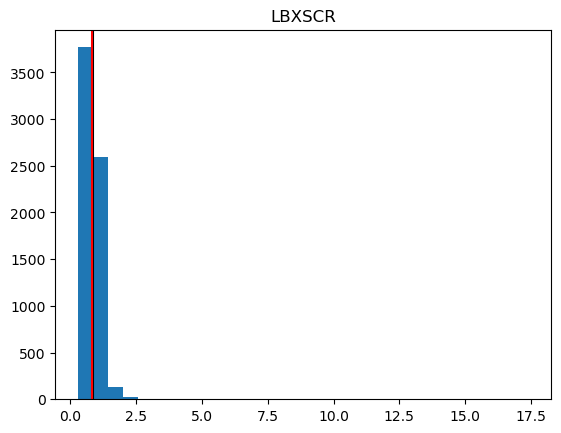

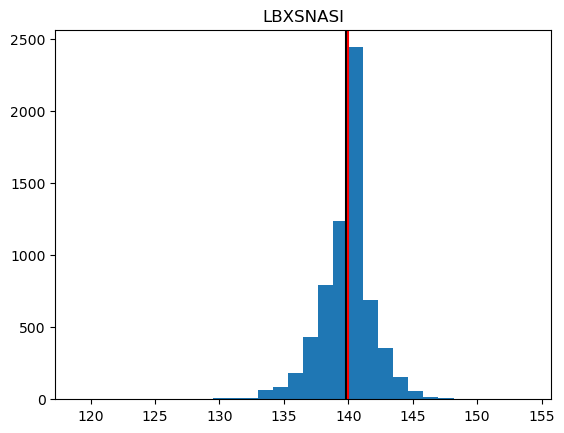

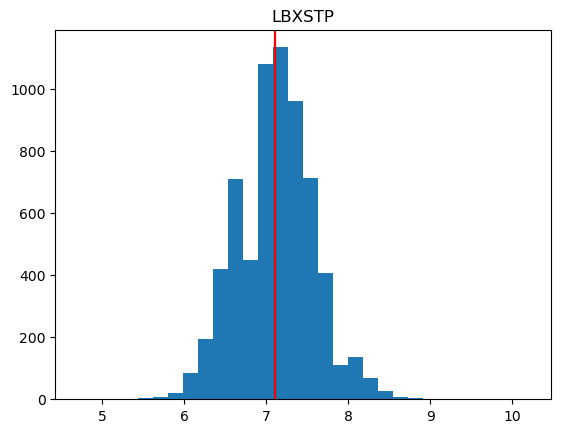

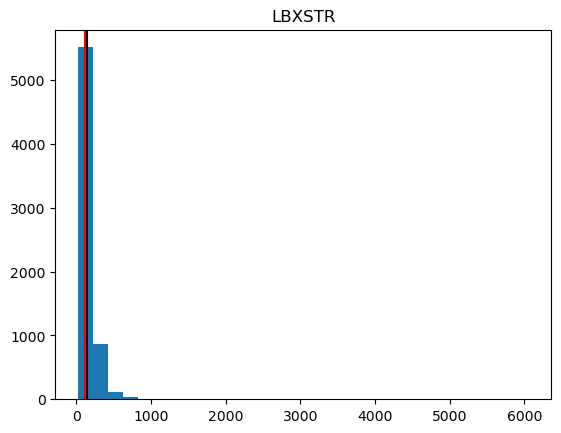

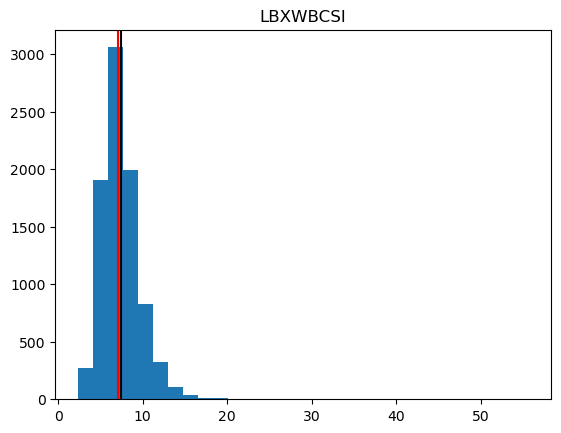

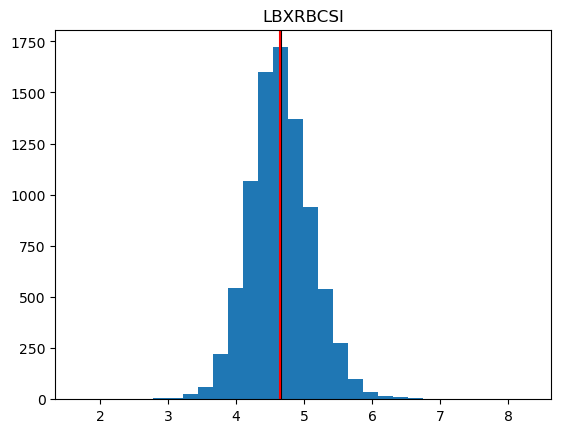

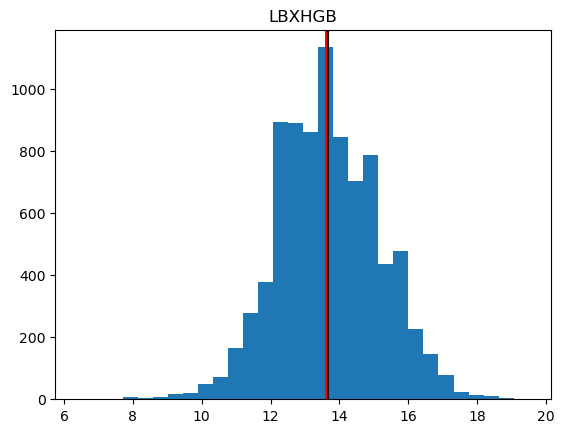

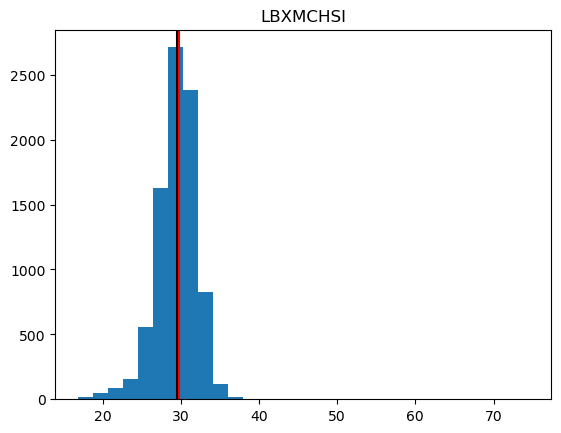

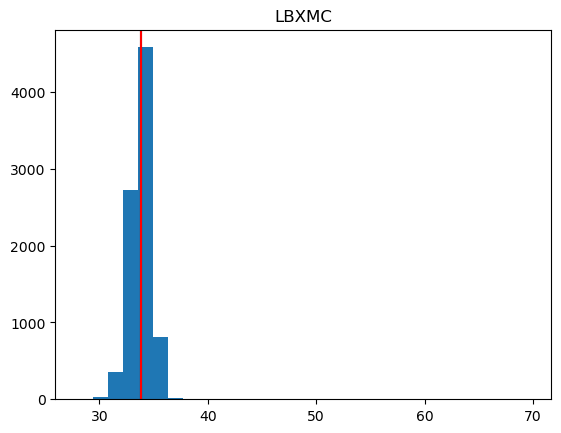

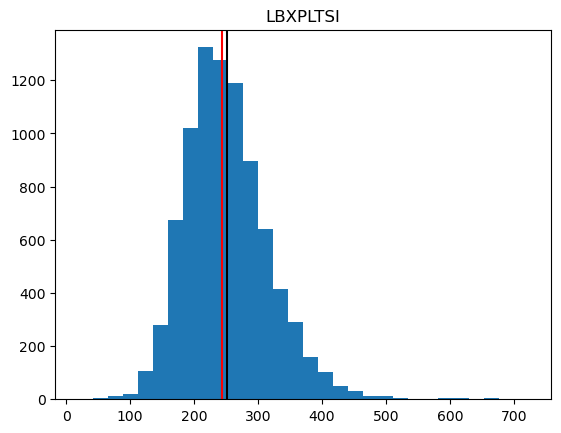

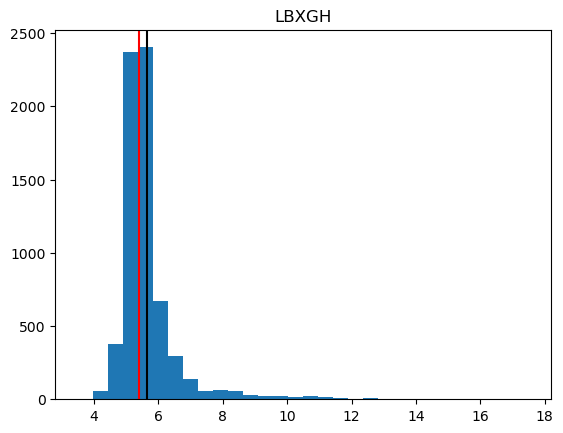

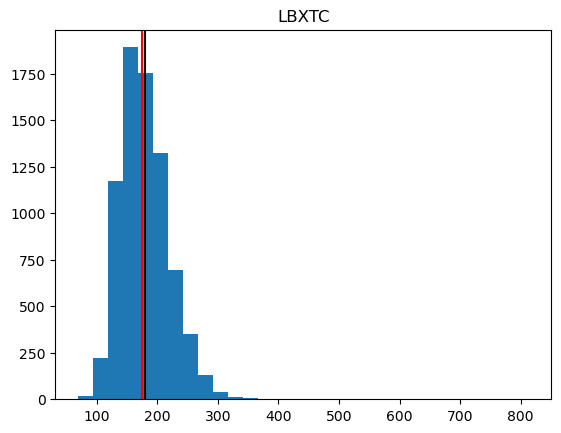

In [88]:
# checking distributions in the clean lab columns 
# creating for loop to create histogram of columns with null values
for column in nullabcol.columns:
    plt.figure()
    plt.hist(labs_df_clean[column], bins = 30)
    plt.axvline(labs_df_clean[column].mean(), color='black')
    plt.axvline(labs_df_clean[column].median(), color = 'red')
    plt.title(column)
    plt.show()

#### Imputation

In [91]:
#impute median for all columms with nulls
for column in nullabcol:
    labs_df_clean[column].fillna(labs_df_clean[column].median(),inplace=True)

In [93]:
# checking nulls 
labs_df_clean.isna().sum()

SEQN        0
LBXSCA      0
LBXSCH      0
LBXSCR      0
LBXSNASI    0
LBXSTP      0
LBXSTR      0
LBXWBCSI    0
LBXRBCSI    0
LBXHGB      0
LBXMCHSI    0
LBXMC       0
LBXPLTSI    0
LBXGH       0
LBXTC       0
dtype: int64

In [198]:
##Scaling Clean Demographic Data
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(ptlabdf_clean)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_ptlabdf_data = my_standard_scaler.transform(ptlabdf_clean)

scaled_ptlabdf = pd.DataFrame(columns=ptlabdf_clean.columns, data=scaled_ptlabdf_data)
scaled_ptlabdf.head()

,SEQN,LBXSCA,LBXSCH,LBXSCR,LBXSNASI,LBXSTP,LBXSTR,LBXWBCSI,LBXRBCSI,LBXHGB,LBXMCHSI,LBXMC,LBXPLTSI,LBXGH,WTSH2YR.x,LBXTC,WTSH2YR.y
0,-1.731380,0.030153,-0.446780,0.876385,-2.124708,-1.583232,0.068396,-1.229208,0.999966,1.100103,0.179124,-0.423043,-0.750089,9.989592,-0.242702,-0.318788,-0.242702
1,-1.731039,-0.970607,-0.475905,-0.175825,-6.534206,1.817142,1.123052,2.444426,-1.887200,-1.276418,0.639958,-1.354831,1.033341,4.237289,0.097358,-0.235790,0.097358
2,-1.730699,-1.971368,-1.640877,0.901438,1.182416,-3.152635,-0.733864,-0.066665,2.016249,2.540419,0.681852,0.508745,-0.215060,3.997610,1.605089,-1.453100,1.605089
3,-1.730359,0.030153,-0.068164,-0.100668,0.080041,-0.013829,-0.193015,0.212345,-0.108705,-0.556260,-0.616862,0.198149,-0.166421,-0.196777,0.247588,-0.291122,0.247588
4,-1.730019,1.698087,0.689068,-0.326141,1.182416,-0.013829,-0.400341,-0.345675,0.145365,0.595992,0.472382,-0.837171,0.806359,-0.795976,-0.242702,0.621861,-0.242702


In [202]:
X = scaled_ptlabdf
scaler = StandardScaler()
Xscaled = scaler.fit(X).transform(X)

In [218]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_ptlabdf)
cluster_labels = kmeans.predict(Xscaled)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


In [220]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled)
in2d = pca.transform(Xscaled)

Text(0.5, 1.0, 'Clustering Demographic Features')

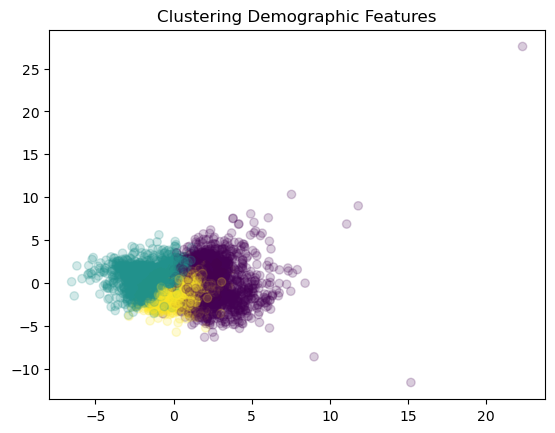

In [231]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha=.2)
plt.title('Clustering Demographic Features')

In [233]:
#create  new dataframe to compare differences between clusters 
pd.DataFrame(Xscaled,columns=X.columns).groupby(cluster_labels).mean().T

,0,1,2
SEQN,0.091850,0.323881,-0.299158
LBXSCA,-0.061847,-0.076350,0.088523
LBXSCH,1.081918,-0.171316,-0.348056
LBXSCR,0.164112,-0.104789,0.009984
LBXSNASI,-0.156705,-0.068082,0.124418
LBXSTP,-0.224392,0.029954,0.076631
LBXSTR,0.624866,-0.158703,-0.153414
LBXWBCSI,0.088752,0.239314,-0.230400
LBXRBCSI,-0.006596,-0.159104,0.129706
LBXHGB,0.472411,-0.744312,0.381395


### Cleaning Diet Dataset

In [208]:
# importing diet data 
diet_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Original_Data/diet.csv')
diet_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [97]:
#viewing diet data shape 
diet_df.shape

(9813, 168)

In [99]:
# creating new dataframe with desired columns
diet_df_clean = diet_df[['SEQN','DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TTFAT'
                      ,'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TFIBE'
                      ,'DR1TSODI', 'DR1TPOTA', 'DR1TCALC', 'DR1TIRON','DR1TVB12'
                      ,'DR1TVC', 'DR1TVD', 'DR1TVK','DR1TALCO', 'DR1TCAFF',
                      'DRQSDIET']].copy()


In [101]:
diet_df_clean.head()

,SEQN,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,...,DR1TPOTA,DR1TCALC,DR1TIRON,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TALCO,DR1TCAFF,DRQSDIET
0,73557,1574.0,43.63,239.59,176.47,52.81,17.819,18.493,8.829,209.0,...,2228.0,949.0,8.41,2.79,241.4,3.3,29.2,0.0,203.0,2.0
1,73558,5062.0,338.13,423.78,44.99,124.29,53.408,35.481,20.505,2584.0,...,4930.0,3193.0,26.88,21.45,2.3,15.2,23.4,119.0,240.0,2.0
2,73559,1743.0,64.61,224.39,102.90,65.97,25.263,20.902,12.953,88.0,...,1694.0,877.0,17.57,3.78,195.1,4.0,40.4,0.0,45.0,1.0
3,73560,1490.0,77.75,162.92,80.58,58.27,23.511,16.986,9.617,187.0,...,2088.0,1521.0,14.19,8.76,93.0,9.9,31.5,0.0,0.0,2.0
4,73561,1421.0,55.24,178.20,87.78,55.36,4.479,26.216,1.263,41.0,...,1445.0,1410.0,17.72,8.30,236.5,23.5,126.0,0.0,24.0,1.0


#### Addressing Nulls

In [104]:
# checking for nulls
diet_df_clean.isnull().sum()

SEQN           0
DR1TKCAL    1282
DR1TPROT    1282
DR1TCARB    1282
DR1TSUGR    1282
DR1TTFAT    1282
DR1TSFAT    1282
DR1TMFAT    1282
DR1TPFAT    1282
DR1TCHOL    1282
DR1TFIBE    1282
DR1TSODI    1282
DR1TPOTA    1282
DR1TCALC    1282
DR1TIRON    1282
DR1TVB12    1282
DR1TVC      1282
DR1TVD      1282
DR1TVK      1282
DR1TALCO    1282
DR1TCAFF    1282
DRQSDIET    1030
dtype: int64

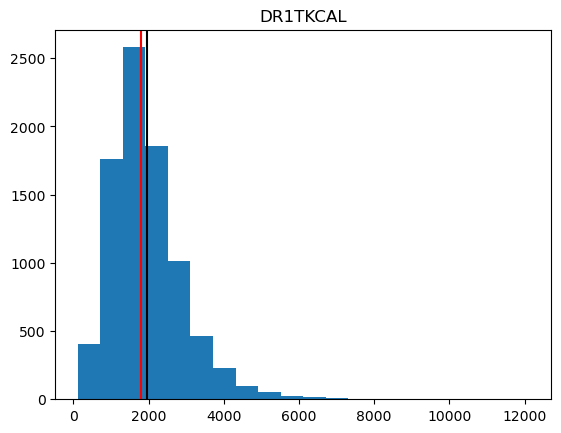

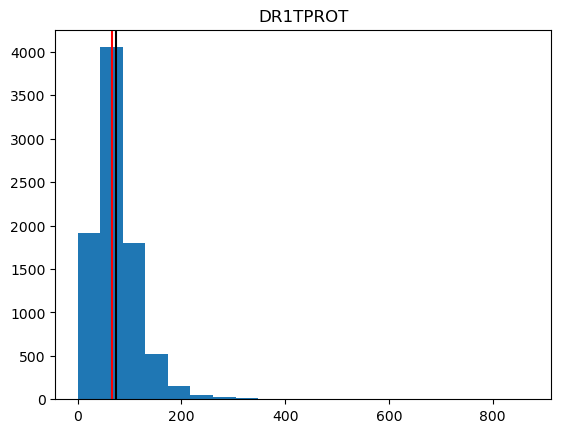

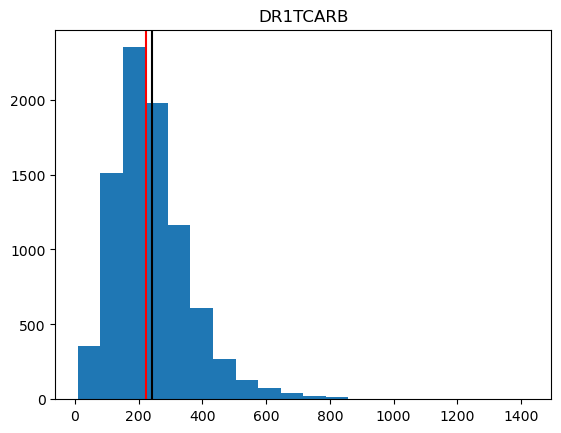

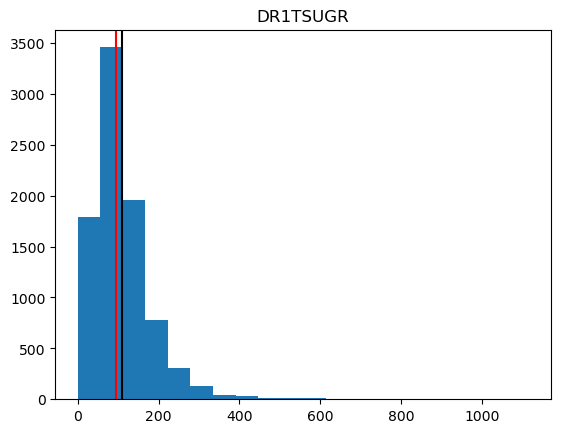

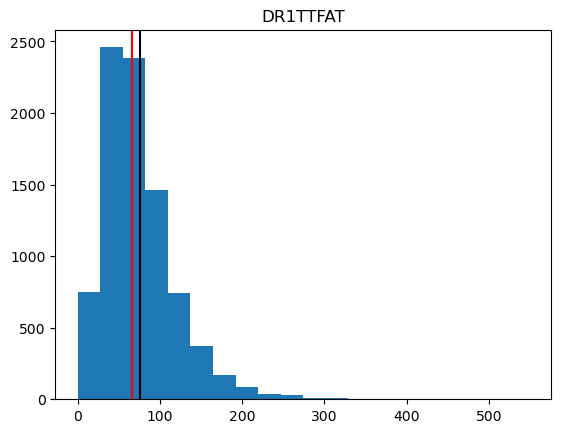

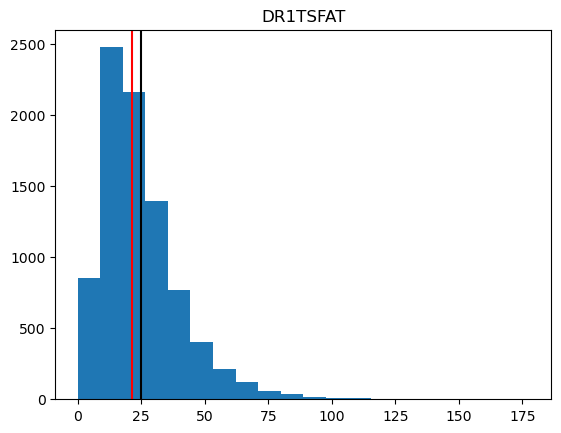

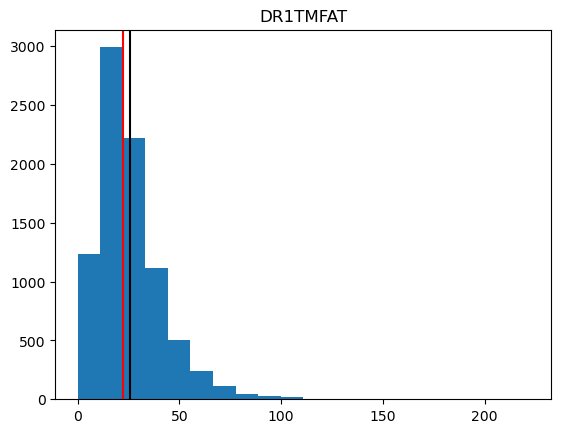

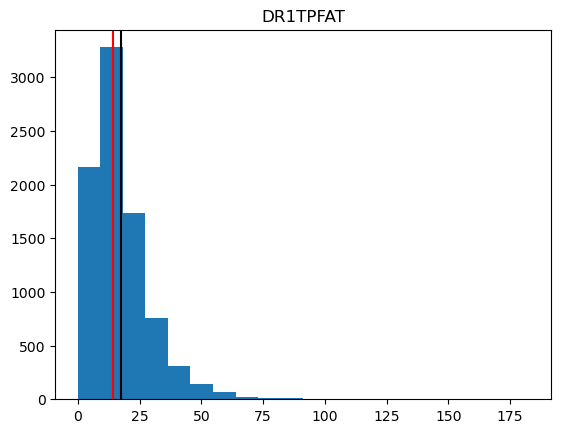

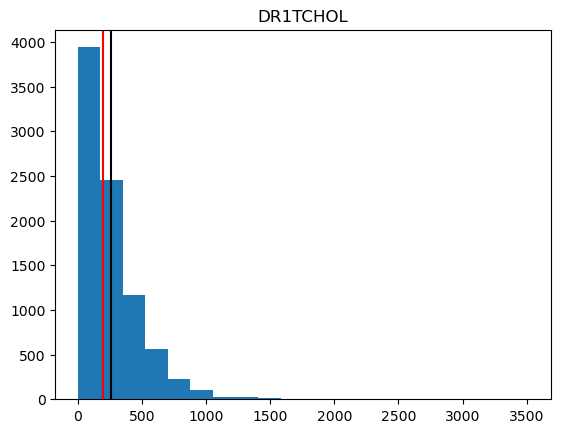

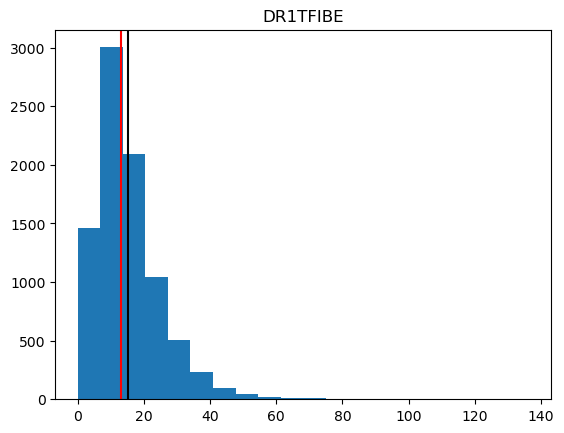

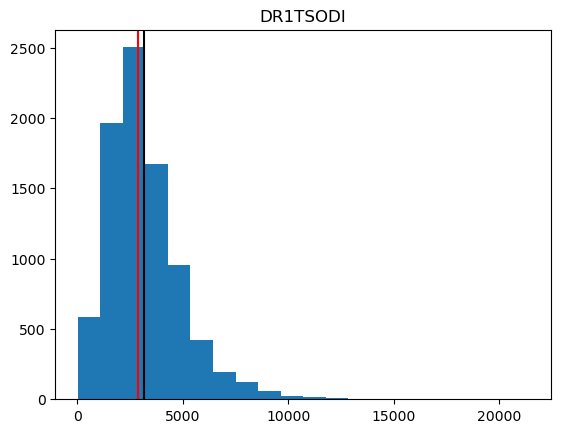

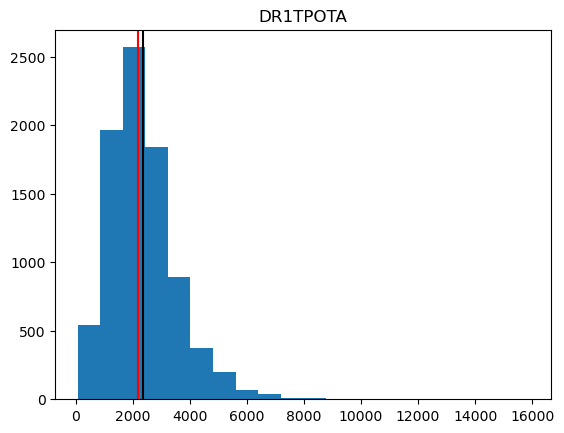

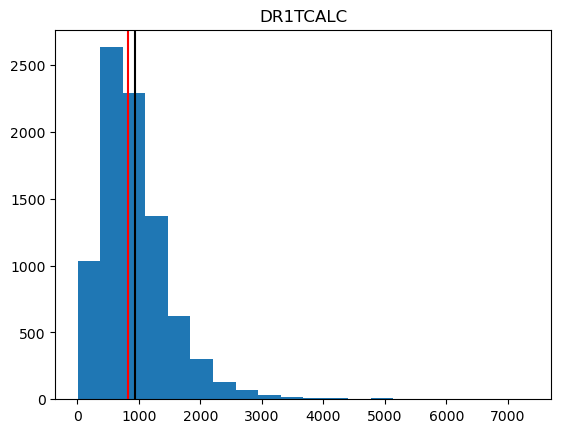

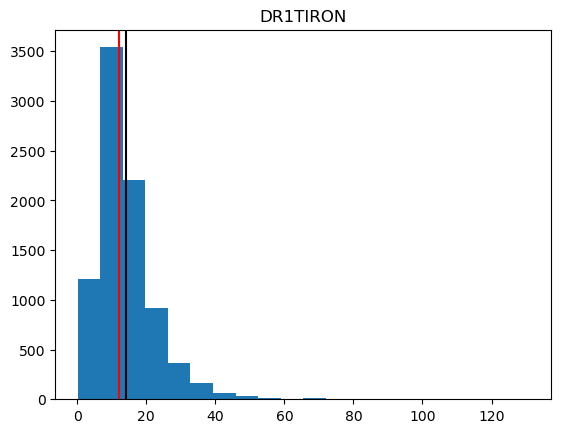

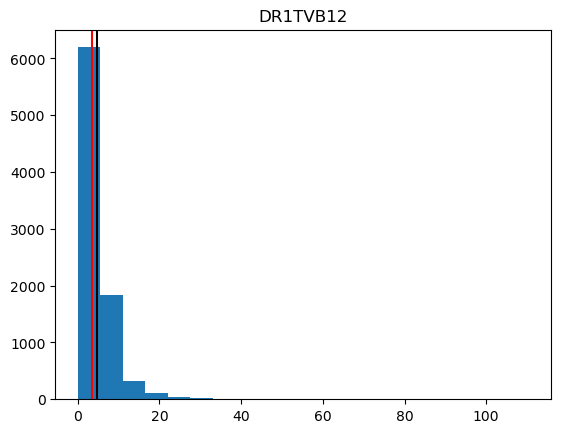

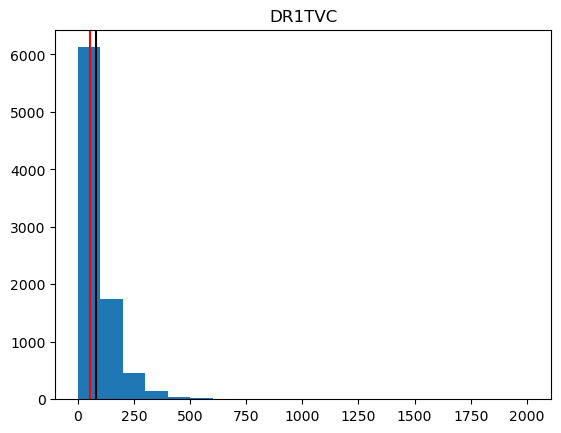

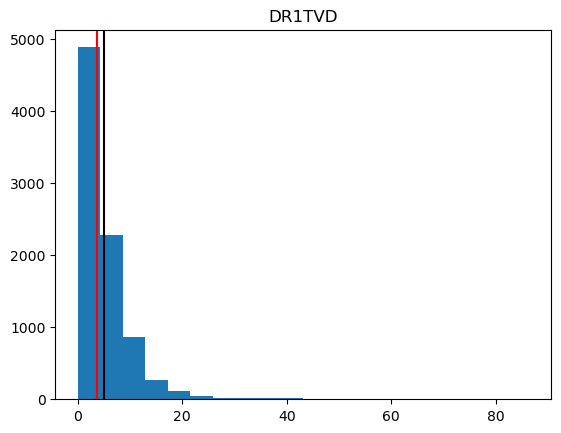

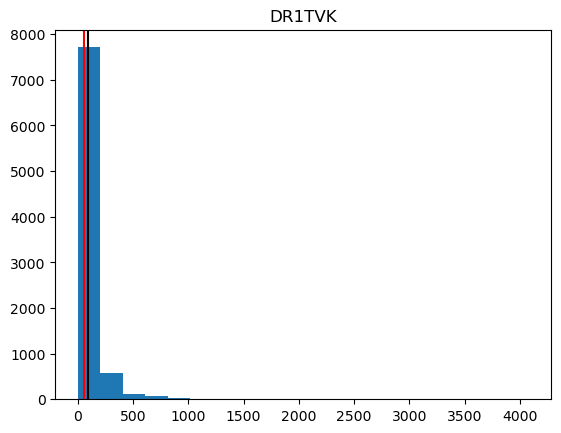

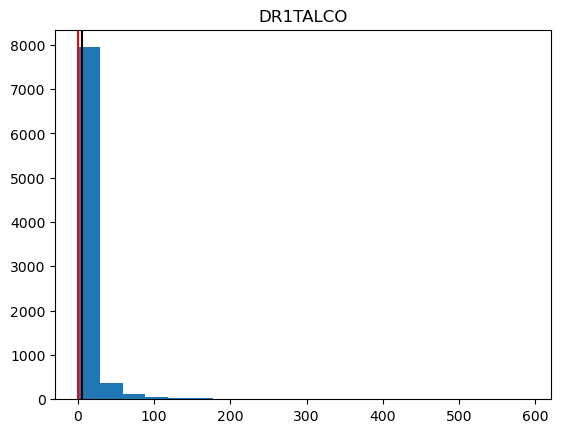

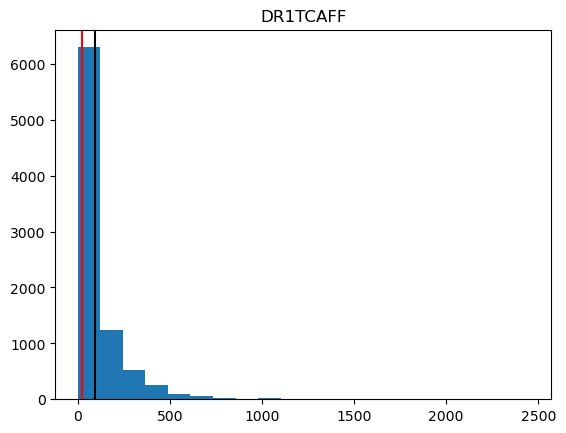

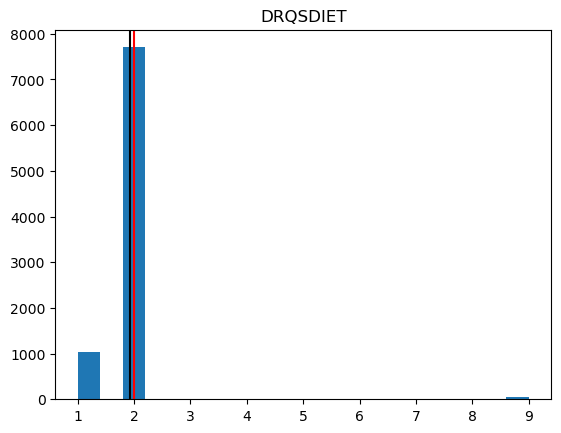

In [106]:
# creating for loop to create histogram of columns with null values
dcols = diet_df_clean.drop(columns='SEQN')

for column in dcols.columns:
    plt.figure()
    plt.hist(diet_df_clean[column], bins = 20) #using smaller bins  
    plt.axvline(diet_df_clean[column].mean(), color='black')
    plt.axvline(diet_df_clean[column].median(), color = 'red')
    plt.title(column)
    plt.show()

#### Imputation

In [108]:
#imputing with median
mdcol = diet_df_clean[['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TTFAT'
                      ,'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TFIBE'
                      ,'DR1TSODI', 'DR1TPOTA', 'DR1TCALC', 'DR1TIRON','DR1TVB12','DR1TVC',
                       'DR1TVD','DR1TVK','DR1TCAFF','DR1TALCO'
                      ]]

for column in mdcol:
    diet_df_clean[column].fillna(diet_df_clean[column].median(),inplace=True)


In [111]:
# imputing with 9 for 'Don't Know' category
diet_df_clean['DRQSDIET'].fillna(9,inplace=True)

In [113]:
#checking for nulls 
diet_df_clean.isna().sum()

SEQN        0
DR1TKCAL    0
DR1TPROT    0
DR1TCARB    0
DR1TSUGR    0
DR1TTFAT    0
DR1TSFAT    0
DR1TMFAT    0
DR1TPFAT    0
DR1TCHOL    0
DR1TFIBE    0
DR1TSODI    0
DR1TPOTA    0
DR1TCALC    0
DR1TIRON    0
DR1TVB12    0
DR1TVC      0
DR1TVD      0
DR1TVK      0
DR1TALCO    0
DR1TCAFF    0
DRQSDIET    0
dtype: int64

### Cleaning Examination Dataset

In [210]:
# importing examination dataset 
exam_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Original_Data/examination.csv')

In [118]:
exam_df.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [120]:
exam_df.columns.tolist()

['SEQN',
 'PEASCST1',
 'PEASCTM1',
 'PEASCCT1',
 'BPXCHR',
 'BPAARM',
 'BPACSZ',
 'BPXPLS',
 'BPXPULS',
 'BPXPTY',
 'BPXML1',
 'BPXSY1',
 'BPXDI1',
 'BPAEN1',
 'BPXSY2',
 'BPXDI2',
 'BPAEN2',
 'BPXSY3',
 'BPXDI3',
 'BPAEN3',
 'BPXSY4',
 'BPXDI4',
 'BPAEN4',
 'BMDSTATS',
 'BMXWT',
 'BMIWT',
 'BMXRECUM',
 'BMIRECUM',
 'BMXHEAD',
 'BMIHEAD',
 'BMXHT',
 'BMIHT',
 'BMXBMI',
 'BMDBMIC',
 'BMXLEG',
 'BMILEG',
 'BMXARML',
 'BMIARML',
 'BMXARMC',
 'BMIARMC',
 'BMXWAIST',
 'BMIWAIST',
 'BMXSAD1',
 'BMXSAD2',
 'BMXSAD3',
 'BMXSAD4',
 'BMDAVSAD',
 'BMDSADCM',
 'MGDEXSTS',
 'MGD050',
 'MGD060',
 'MGQ070',
 'MGQ080',
 'MGQ090',
 'MGQ100',
 'MGQ110',
 'MGQ120',
 'MGD130',
 'MGQ90DG',
 'MGDSEAT',
 'MGAPHAND',
 'MGATHAND',
 'MGXH1T1',
 'MGXH1T1E',
 'MGXH2T1',
 'MGXH2T1E',
 'MGXH1T2',
 'MGXH1T2E',
 'MGXH2T2',
 'MGXH2T2E',
 'MGXH1T3',
 'MGXH1T3E',
 'MGXH2T3',
 'MGXH2T3E',
 'MGDCGSZ',
 'OHDEXSTS',
 'OHDDESTS',
 'OHXIMP',
 'OHX01TC',
 'OHX02TC',
 'OHX03TC',
 'OHX04TC',
 'OHX05TC',
 'OHX06TC',
 'OHX07TC',
 

In [122]:
# creating new dataframe from examination dataset with desired columns
exam_df_clean = exam_df[[ 'SEQN', 'BPXCHR', 'BPXPULS', 'BPXSY1', 
                  'BPXSY2', 'BPXSY3', 'BPXDI1', 
                  'BPXDI2', 'BPXDI3',  'BMXWT',
                  'BMXHT', 'BMXBMI', 'BMXWAIST',
                  'BMXARMC', 'BMXLEG']].copy()

In [124]:
exam_df_clean.head()

,SEQN,BPXCHR,BPXPULS,BPXSY1,BPXSY2,BPXSY3,BPXDI1,BPXDI2,BPXDI3,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMXARMC,BMXLEG
0,73557,NaN,1.0,122.0,114.0,102.0,72.0,76.0,74.0,78.3,171.3,26.7,100.0,35.3,39.2
1,73558,NaN,1.0,156.0,160.0,156.0,62.0,80.0,42.0,89.5,176.8,28.6,107.6,34.7,40.0
2,73559,NaN,1.0,140.0,140.0,146.0,90.0,76.0,80.0,88.9,175.3,28.9,109.2,33.5,40.0
3,73560,NaN,1.0,108.0,102.0,104.0,38.0,34.0,38.0,32.2,137.3,17.1,61.0,21.0,33.5
4,73561,NaN,1.0,136.0,134.0,142.0,86.0,88.0,86.0,52.0,162.4,19.7,NaN,25.2,36.3


#### Addressing Nulls

In [127]:
exam_df_clean.isnull().sum()

SEQN           0
BPXCHR      7852
BPXPULS      302
BPXSY1      2641
BPXSY2      2404
BPXSY3      2405
BPXDI1      2641
BPXDI2      2404
BPXDI3      2405
BMXWT         90
BMXHT        746
BMXBMI       758
BMXWAIST    1152
BMXARMC      512
BMXLEG      2411
dtype: int64

In [129]:
# dropping BPXCHR, too many nulls 
exam_df_clean = exam_df_clean.drop(columns='BPXCHR')

In [131]:
examcols = exam_df_clean.drop(columns='SEQN')

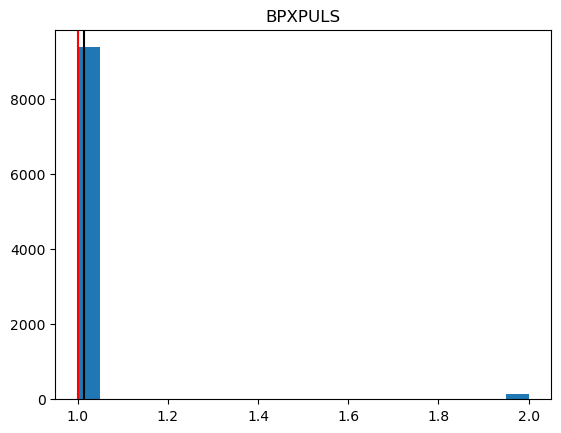

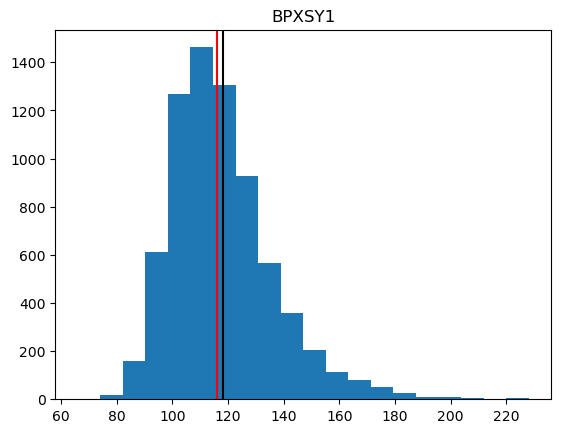

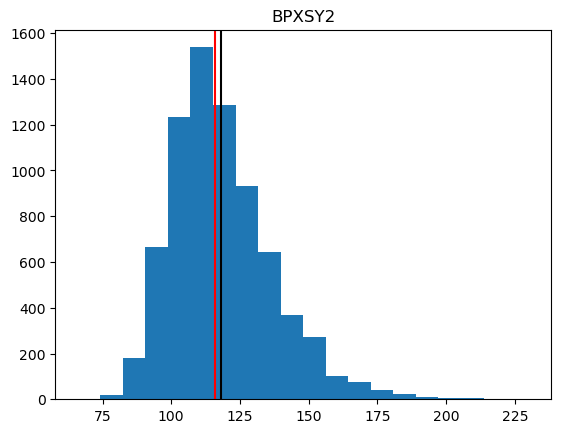

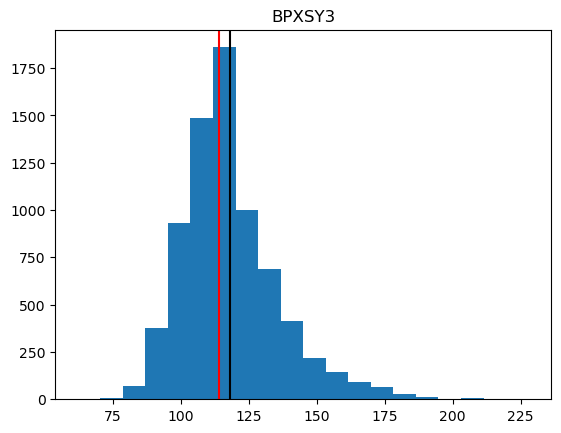

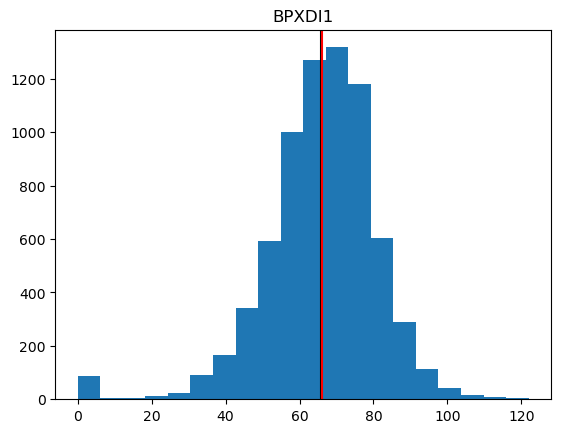

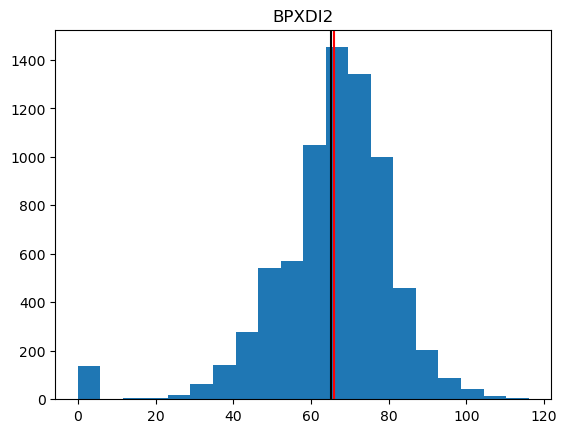

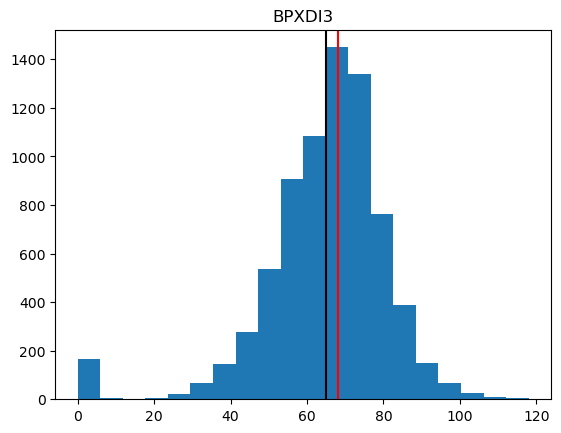

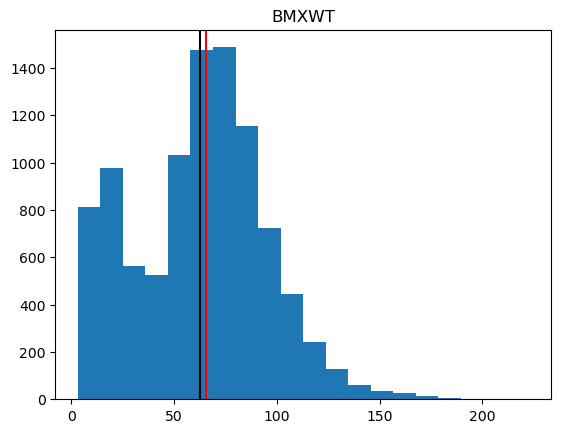

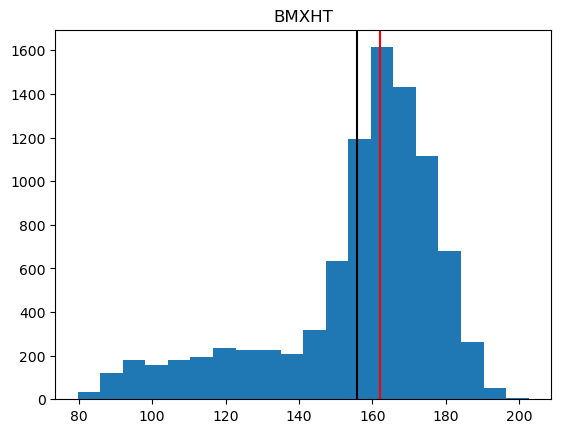

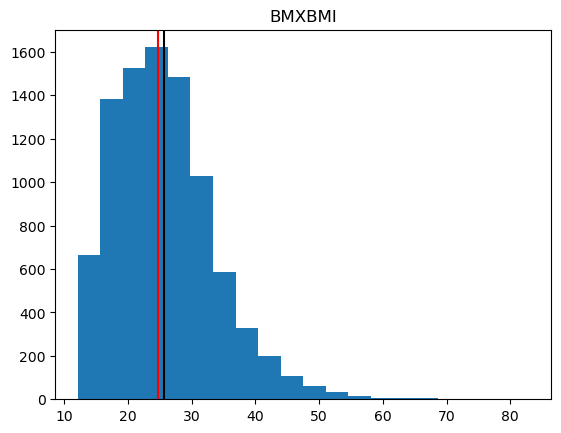

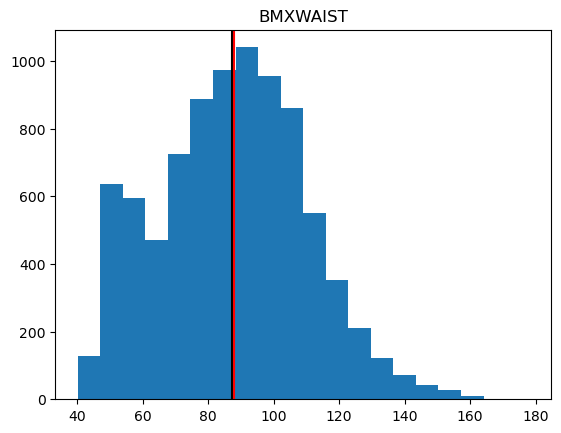

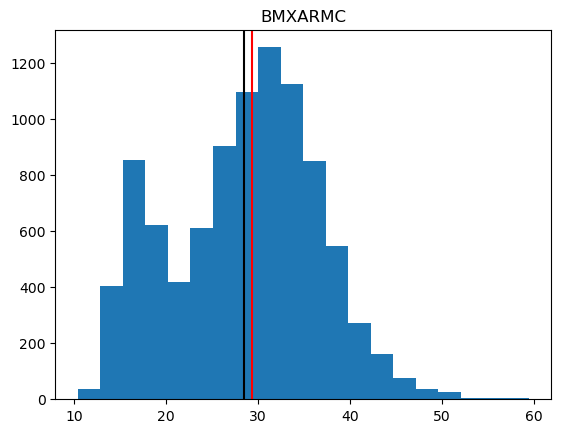

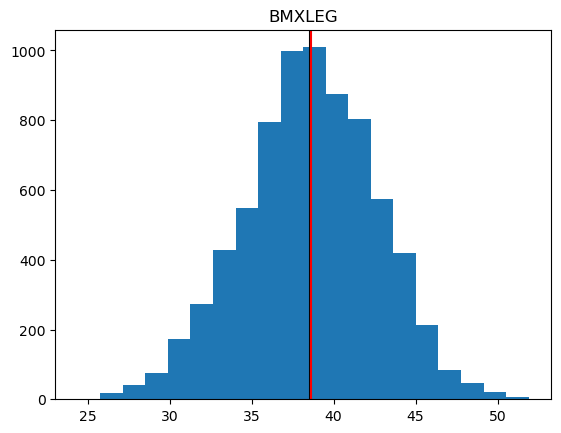

In [133]:
for column in examcols.columns:
    plt.figure()
    plt.hist(exam_df_clean[column], bins = 20) #using smaller bins  
    plt.axvline(exam_df_clean[column].mean(), color='black')
    plt.axvline(exam_df_clean[column].median(), color = 'red')
    plt.title(column)
    plt.show()

#### Imputation

In [136]:
#imputting the median for all columns that have null values 
cols = exam_df_clean.columns

for column in cols:
    exam_df_clean[column].fillna(exam_df_clean[column].median(),inplace=True)

In [138]:
# checking for nulls
exam_df_clean.isna().sum()

SEQN        0
BPXPULS     0
BPXSY1      0
BPXSY2      0
BPXSY3      0
BPXDI1      0
BPXDI2      0
BPXDI3      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXWAIST    0
BMXARMC     0
BMXLEG      0
dtype: int64

### Cleaning Medication Dataset

In [212]:
#importing medications dataset
medic_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Original_Data/medications.csv', encoding='latin1')

In [143]:
medic_df.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [145]:
medic_df.shape

(20194, 13)

#### Addressing Nulls

In [148]:
medic_df.isna().sum()

SEQN            0
RXDUSE          0
RXDDRUG      6094
RXDDRGID     6178
RXQSEEN      6175
RXDDAYS      6176
RXDRSC1      6172
RXDRSC2     19480
RXDRSC3     20067
RXDRSD1      6561
RXDRSD2     19480
RXDRSD3     20067
RXDCOUNT     6094
dtype: int64

In [150]:
#removing columns with highest nulls
medic_df_clean = medic_df.drop(columns=['RXDRSC2','RXDRSC3','RXDRSD2','RXDRSD3','RXDRSC1','RXDDRGID','RXDRSD1'])

In [152]:
medic_df_clean.isna().sum()

SEQN           0
RXDUSE         0
RXDDRUG     6094
RXQSEEN     6175
RXDDAYS     6176
RXDCOUNT    6094
dtype: int64

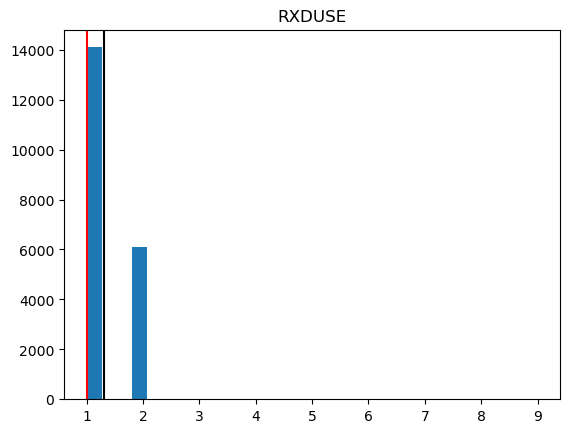

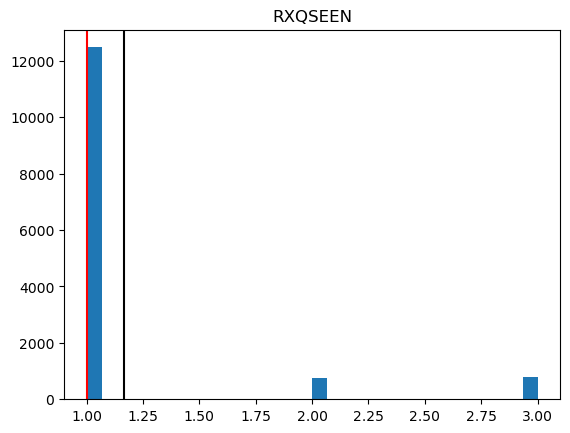

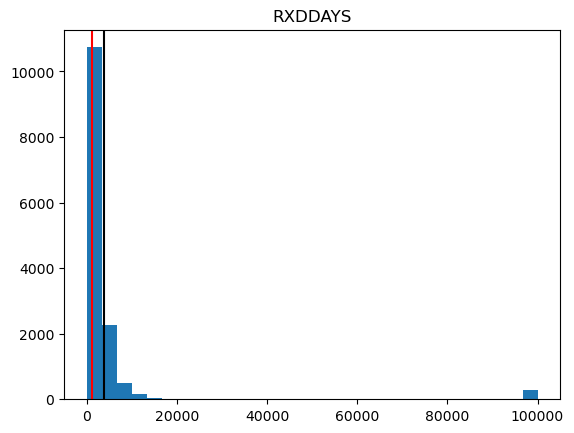

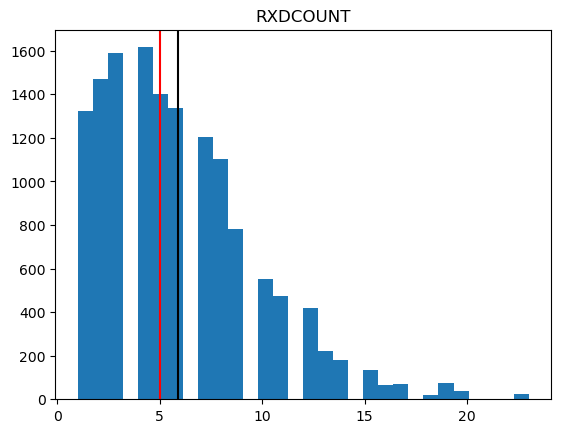

In [154]:
# addressing numeric columns with null values
col = medic_df_clean.select_dtypes("number").drop(columns='SEQN')
for column in col.columns:
    plt.figure()
    plt.hist(medic_df_clean[column], bins = 30) #used 30 as default 
    plt.axvline(medic_df_clean[column].mean(), color='black')
    plt.axvline(medic_df_clean[column].median(), color = 'red')
    plt.title(column)
    plt.show()

In [156]:
#filling numeric columns with null values with median 
mdcol = medic_df_clean.select_dtypes("number")
for column in mdcol:
    medic_df_clean[column].fillna(medic_df_clean[column].median(),inplace=True)

In [158]:
# the rest are categoricals, will deal with them separately
medic_df_clean.isna().sum()

SEQN           0
RXDUSE         0
RXDDRUG     6094
RXQSEEN        0
RXDDAYS        0
RXDCOUNT       0
dtype: int64

##### Looking at Categorical Nulls

<AxesSubplot:>

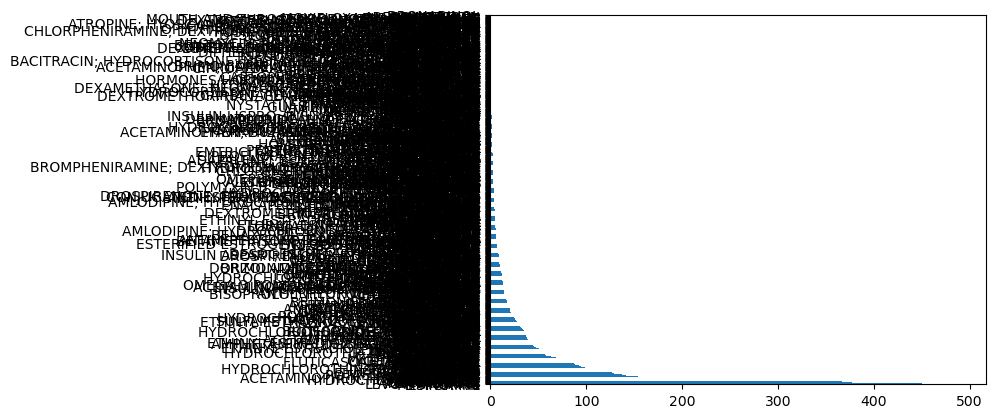

In [161]:
medic_df_clean['RXDDRUG'].value_counts().plot(kind = 'barh')

<BarContainer object of 699 artists>

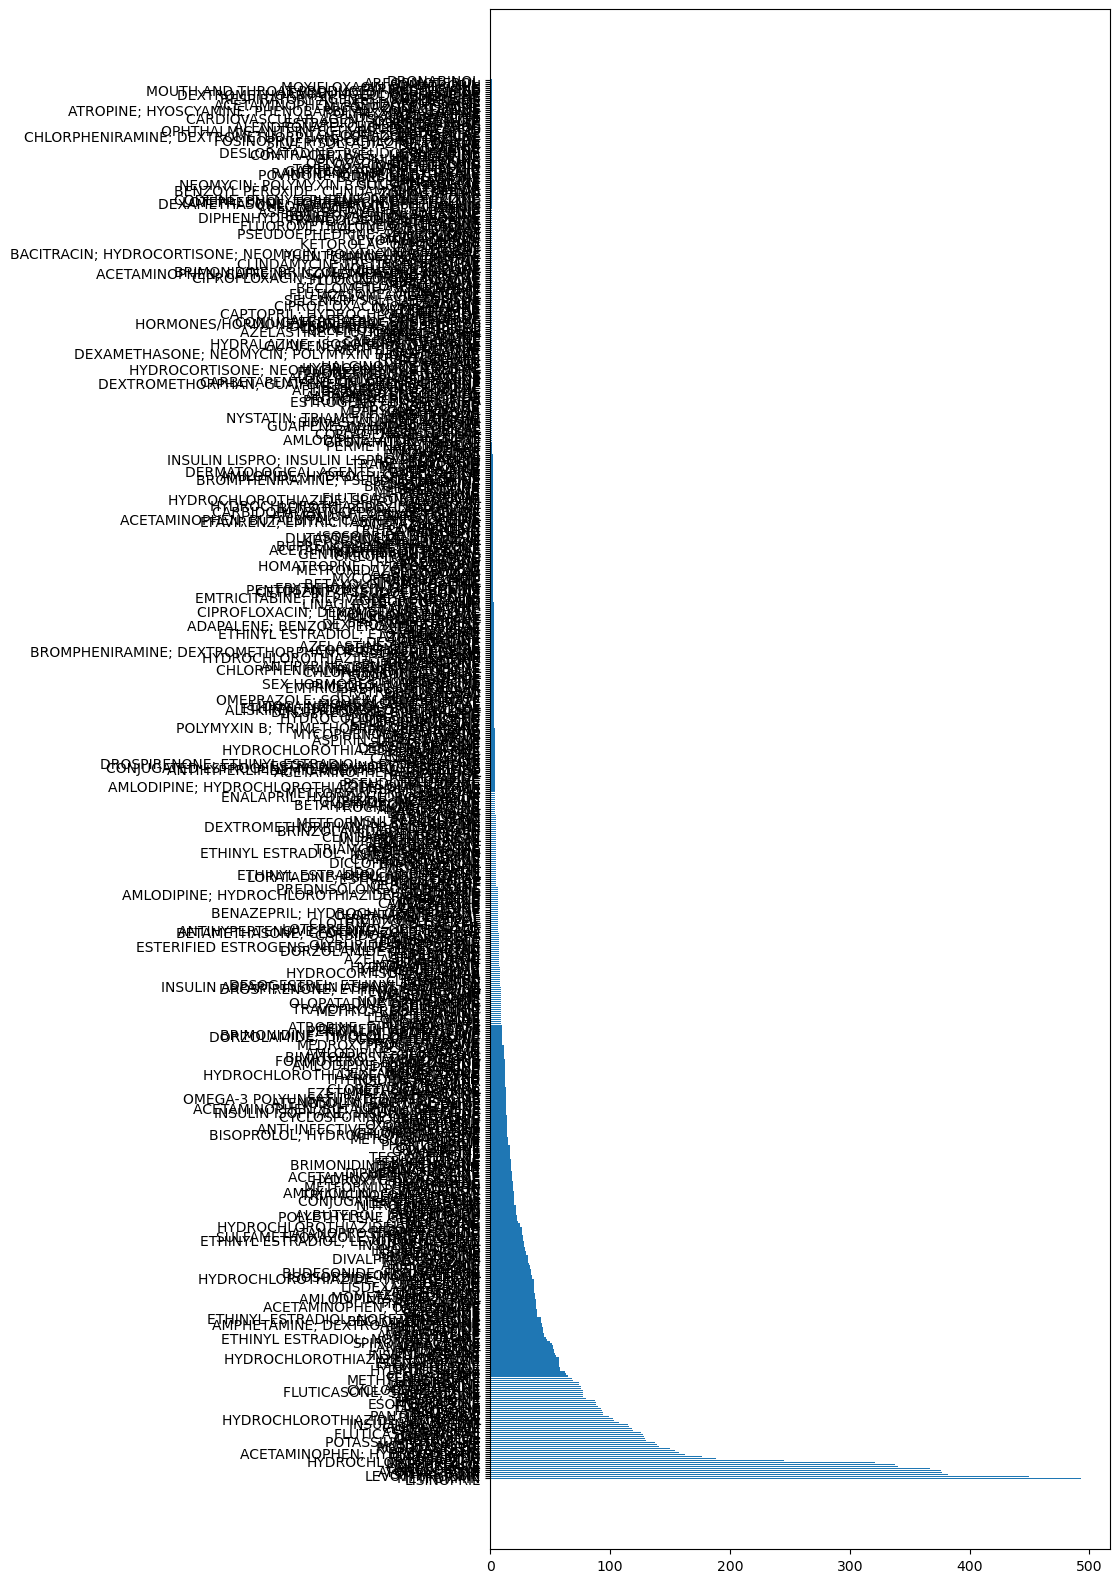

In [162]:
#making bigger graph
plt.figure(figsize=(8,20))
vc = medic_df_clean.RXDDRUG.value_counts()
plt.barh(y=vc.index,width = vc.values)

In [165]:
medic_df_clean['RXDDRUG'].value_counts()

LISINOPRIL                 493
METFORMIN                  450
LEVOTHYROXINE              382
SIMVASTATIN                377
ATORVASTATIN               376
                          ... 
PYRIDOSTIGMINE               1
MOXIFLOXACIN OPHTHALMIC      1
SOMATROPIN                   1
ARFORMOTEROL                 1
DRONABINOL                   1
Name: RXDDRUG, Length: 699, dtype: int64

In [167]:
# normalize to impute random empirical values

probs = medic_df_clean["RXDDRUG"].value_counts(normalize = True).values
names=medic_df_clean["RXDDRUG"].value_counts().index
n_nans = medic_df_clean["RXDDRUG"].isna().sum()
random_empirical = np.random.choice(names,p=probs,size=n_nans)
random_empirical

array(['BUDESONIDE', '99999', 'FUROSEMIDE', ..., 'ALPRAZOLAM',
       'RANOLAZINE', 'SIMVASTATIN'], dtype=object)

<AxesSubplot:>

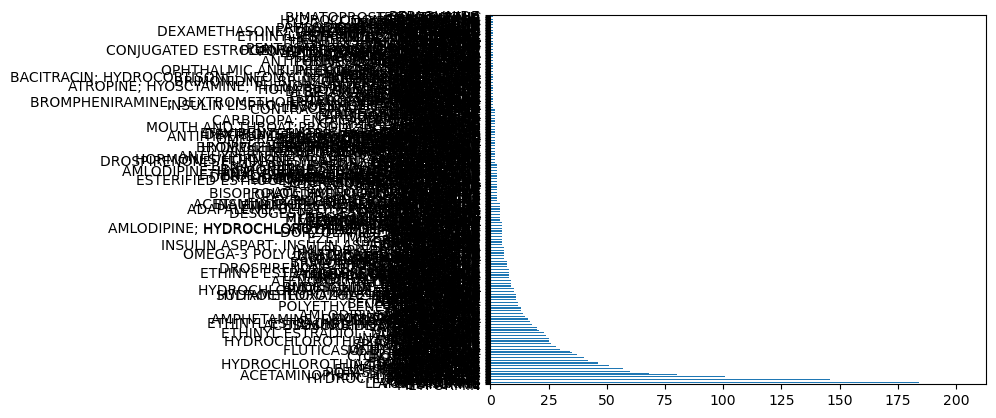

In [169]:
# visualizing distribution
pd.Series(random_empirical).value_counts().plot(kind = 'barh')

In [170]:
# inserting and applying random empirical values to nulls 
sel= medic_df_clean['RXDDRUG'].isna()
medic_df_clean.loc[sel,'RXDDRUG']= random_empirical

In [171]:
# checking nulls 
medic_df_clean.isna().sum()

SEQN        0
RXDUSE      0
RXDDRUG     0
RXQSEEN     0
RXDDAYS     0
RXDCOUNT    0
dtype: int64

### Creating Dictionaries 

Two dictionaries will be created.

1: To map all the clean dataframes to ensure each dataframe has the same SEQN number, or in other words, the same participant is present in all dataframes

2: Rename the columns in all the dataframes

#### Mapping SEQN # Dictionary

In [177]:
# finding common SEQN number in each dataset 
common_seqn = set(demographic_df_clean['SEQN'])
for df in [quest_df_clean,labs_df_clean,diet_df_clean, exam_df_clean, medic_df_clean]:
    common_seqn.intersection_update(df['SEQN'])

#list with common seqn numbers
common_seqn = list(common_seqn)

demographic_df_clean_filtered = demographic_df_clean[demographic_df_clean['SEQN'].isin(common_seqn)]
quest_df_clean_filtered = quest_df_clean[quest_df_clean['SEQN'].isin(common_seqn)]
labs_df_clean_filtered = labs_df_clean[labs_df_clean['SEQN'].isin(common_seqn)]
diet_df_clean_filtered = diet_df_clean[diet_df_clean['SEQN'].isin(common_seqn)]
exam_df_clean_filtered = exam_df_clean[exam_df_clean['SEQN'].isin(common_seqn)]
medic_df_clean_filtered = medic_df_clean[medic_df_clean['SEQN'].isin(common_seqn)]


The following dictionary will be used to rename columns

#### Renaming Columns Dictionary 

In [181]:
df1 = demographic_df_clean_filtered
df2 = quest_df_clean_filtered
df3 = labs_df_clean_filtered
df4 = diet_df_clean_filtered
df5 = exam_df_clean_filtered
df6 = medic_df_clean_filtered

rename_dict = {
 # Clean, filtered, demographic dataset
    'RIAGENDR': 'sex',
    'RIDAGEYR': 'age',
    'RIDRETH1': 'race_HispOrigin',
    'RIDRETH3': 'race_HispOrigin_Asian',
    'DMDBORN4': 'native_country',
    'DMDCITZN': 'US_Citizen',
    'DMDEDUC2': 'edu_level',
    'DMDMARTL': 'marital_stat',
    'SIALANG':  'SPinterview_lang',
    'SIAINTRP': 'SP_interpreter',
    'DMDHHSIZ': 'household_size',
    'DMDFMSIZ': 'family_size',
    'DMDHHSZA': 'household_size_children',
    'DMDHHSZB': 'household_size_children_6-17',
    'DMDHHSZE': 'household_size_adult60',
    'DMDHRGND': 'household_ref_sex',
    'DMDHRAGE': 'household_ref_age',
    'DMDHREDU': 'household_ref_edu_level',
    'DMDHRMAR': 'household_ref_marital_stat',
    'WTINT2YR': 'Full_Samp_2yr_INTRWT',
    'WTMEC2YR': 'Full_Samp_2yr_MECWT',
    'SDMVPSU':  'Maskedvar_psuedo_psu',
    'SDMVSTRA': 'Maskedvar_psuedo_strat',
    'INDHHIN2': 'total_household_income',
    'INDFMIN2': 'total_family_income',
    'INDFMPIR': 'fam_income_poverty_ratio',
    # Clean, filtered, questionnaire dataset
    'BPQ020': 'high_bp',
    'BPQ080': 'high_col',
    'DIQ010': 'have_diabetes',
    'DIQ170': 'diabetes_risk', # Family history or risk factors for diabetes
    'DIQ050': 'taking_insulin',
    'SMQ020': 'smoked_greater_100cigs',
    'ALQ101': 'drink_greater_12',
    'PAQ605': 'vig_work_activity',
    'PAQ620': 'mod_work_activity',
    'PAQ650': 'vig_rec_activity',
    'PAQ665': 'mod_rec_activity',
    'DPQ010': 'little_interest_doing_things',
    'DPQ020': 'feeling_depressed',
    'MCQ160B': 'chf',
    'MCQ160C': 'chd',
    'MCQ160D': 'angina',
    'MCQ160E': 'angina_age_first_present',
    'MCQ160F': 'stroke',
    'MCQ300A': 'closerel_heartattack',
    'MCQ370A': 'losing_wt',
    'MCQ370B': 'increasing_exc',
    'MCQ370C': 'reducing_salt_dt',
    'MCQ370D': 'reducing_fat_dt',
    'HIQ011':  'insured',
    # Clean, filtered, lab dataset 
    'LBXSCA': 'total_calcium_lab',
    'LBXSCH': 'chol_lab',
    'LBXSCR': 'creatinine',
    'LBXSNASI': 'sodium_lab',
    'LBXSTP': 'total_protein_lab',
    'LBXSTR': 'trigly_refridg',
    'LBXWBCSI': 'wbc_cnt',
    'LBXRBCSI': 'rbc_cnt',
    'LBXHGB': 'hemoglobin',
    'LBXMCHSI': 'hemoglobin_mean',
    'LBXMC': 'hemoglobin_conc',
    'LBXPLTSI': 'platelet_cnt',
    'LBXGH': 'HbA1c_percent',
    'LBXTC': 'total_chol_lab',
    # Clean, filtered, diet dataset 
    'DR1TKCAL': 'energy_kcal',
    'DR1TPROT': 'protein_gm',
    'DR1TCARB': 'carb_gm',
    'DR1TSUGR': 'tot_sugar_gm',
    'DR1TTFAT': 'tot_fat_gm',
    'DR1TSFAT': 'tot_sat_fattyacids_gm',
    'DR1TMFAT': 'tot_monounsat_fattyacids_gm',
    'DR1TPFAT': 'tot_polyunsat_fattyacids_gm',
    'DR1TCHOL': 'chol_mg_diet',
    'DR1TFIBE': 'fiber_gm_diet',
    'DR1TSODI': 'sodium_mg_diet',
    'DR1TPOTA': 'potassium_mg_diet',
    'DR1TCALC': 'calcium_mg_diet',
    'DR1TIRON': 'iron_mg_diet',
    'DR1TVB12': 'vit_b12_mcg',
    'DR1TVC': 'vit_c_mg',
    'DR1TVD': 'vit_d_mcg',
    'DR1TVK': 'vit_k_mcg',
    'DR1TALCO': 'alcohol_gm',
    'DR1TCAFF': 'caffeine_mg',
    'DRQSDIET': 'on_special_diet',
    # Clean, filtered, exam dataset 
    'BPXPULS': 'puls_reg_nonreg',
    'BPXSY1': 'bpsy_r1',
    'BPXSY2': 'bpsy_r2',
    'BPXSY3': 'bpsy_r3',
    'BPXDI1': 'bpdi_r1',
    'BPXDI2': 'bpdi_r2',
    'BPXDI3': 'bpdi_r3',
    'BMXWT':  'weight_kg',
    'BMXHT': 'height_cm',
    'BMXBMI': 'bmi',
    'BMXWAIST': 'waist_circum_cm',
    'BMXARMC': 'arm_circum_cm',
    'BMXLEG': 'leg_len_cm',
    # Clean, filtered, medications dataset
    'RXDUSE': 'rx_use',
    'RXDDRUG': 'drug_name',
    'RXDDRGID': 'drug_code',
    'RXDDAYS': 'rx_days',
    'RXDRSD1': 'rx_descr',
    'RXDCOUNT': 'rx_amt'
 }

dataframes = [df1,df2,df3,df4,df5,df6]

for df in dataframes:
    df.rename(columns=rename_dict, inplace=True)

C:\Users\isouf\AppData\Local\Temp\ipykernel_24972\4204937878.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_dict, inplace=True)
C:\Users\isouf\AppData\Local\Temp\ipykernel_24972\4204937878.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_dict, inplace=True)
C:\Users\isouf\AppData\Local\Temp\ipykernel_24972\4204937878.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.r

In [183]:
# checking if columns have been renamed
for df in dataframes:
    print(df.columns)

Index(['SEQN', 'sex', 'age', 'race_HispOrigin', 'race_HispOrigin_Asian',
       'native_country', 'US_Citizen', 'edu_level', 'marital_stat',
       'SPinterview_lang', 'SP_interpreter', 'household_size', 'family_size',
       'household_size_children', 'household_size_children_6-17',
       'household_size_adult60', 'household_ref_sex', 'household_ref_age',
       'household_ref_edu_level', 'household_ref_marital_stat',
       'Full_Samp_2yr_INTRWT', 'Full_Samp_2yr_MECWT', 'Maskedvar_psuedo_psu',
       'Maskedvar_psuedo_strat', 'total_household_income',
       'total_family_income', 'fam_income_poverty_ratio'],
      dtype='object')
Index(['SEQN', 'high_bp', 'high_col', 'have_diabetes', 'diabetes_risk',
       'taking_insulin', 'smoked_greater_100cigs', 'drink_greater_12',
       'vig_work_activity', 'mod_work_activity', 'vig_rec_activity',
       'mod_rec_activity', 'little_interest_doing_things', 'feeling_depressed',
       'chf', 'chd', 'angina', 'angina_age_first_present', 'stroke

### Saving Clean, Filtered, and Renamed Dataframes as CSV Files

In [186]:
# Save demographic dataframe to CSV
df1.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/demographic_df_clean_filtered.csv', index=False)

In [188]:
# Save questionnaire dataframe to CSV
df2.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/quest_df_clean_filtered.csv', index=False)

In [190]:
# Save labs dataframe to CSV
df3.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/labs_df_clean_filtered.csv', index=False)

In [192]:
# Save diet dataframe to CSV
df4.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/diet_df_clean_filtered.csv', index=False)

In [194]:
# Save exam dataframe to CSV
df5.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/exam_df_clean_filtered.csv', index=False)

In [196]:
# Save medications dataframe to CSV
df6.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/medic_df_clean_filtered.csv', index=False)